## Introduction

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

In [1]:
#Importing all necessary libraries
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

# Importing and analyzing the Current Application & Previous Application Datasets.



In [3]:
new_app = pd.read_csv('application_data.csv')

In [4]:
prev_app = pd.read_csv('previous_application.csv')

In [5]:
new_app.shape

(307511, 122)

In [6]:
new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
# checking the first 5 rows of the new_app dataset

new_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
# checking the first 5 rows of the new_app dataset

prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

 - Current Application Datast has 307511 entries and 122 variables where 65 are float dtype, 41 are int dtype and 16 object dtype.
 
 - Previous Application Datast has 1670214 entries and 37 variables where 15 are float dtype, 6 are int dtype and 16 object dtype.

### Checking Common columns in both datasets with the help of loops

In [10]:
com_var  = []
uncom_var = []
for i in new_app:
    if i in prev_app:
        com_var.append(i)
print(len(com_var))
print(com_var)

8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


- There are 8 common variables in both datasets.
- 'SK_ID_CURR' is the unique identifier

# Data Cleaning 

## 1. Handling Missing Values

## Cleaning the prev_app Dataset 

- Checking for null values in prev_app dataset

In [11]:
prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [12]:
len(prev_app.columns)

37

In [13]:
#null value perentages in each column
prev_app.isnull().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

-  Missing or null value perecntage in previous application dataset is even higher

  - Out of Total 37 some columns have nearly 100 percent of data missing
 
 
### Filtering and Removing all columns with more than 20% missing values

In [14]:
null_percent_prev = prev_app.isnull().sum()/len(prev_app)*100
null_percent_prev[null_percent_prev.values >= 20.0]

AMT_ANNUITY                  22.286665
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

- Creating a new dataframe and Dropping these values

In [15]:
prev_app_1 = prev_app.drop(columns = (null_percent_prev[null_percent_prev.values >= 20.0]).index)
prev_app_1.shape

(1670214, 23)

In [16]:
prev_app_1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [17]:
prev_app_1.isnull().sum()/len(prev_app_1)*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716
dtype: float64

- Percentage null values in the new dataframe prev_app_1 are extemely small so no further treatment for the data set is necesary

## Cleaning the new_app Dataset

- Checking for null values in new_app datset

In [18]:
pd.set_option('display.max_rows',None)
new_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [19]:
#null value perentages in each column
new_app.isnull().sum()/len(new_app)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

- In total of 122 columns, there are a number of columns which have null values more than50 percent(some columns have nearly 60% null values)
- Filtering columns with null values ablove 19 percent and removing(On close inspection it can be seen that beyond 19%

### Filtering all Columns which have more than 19% null values and dropping them.

In [20]:

null_percent = new_app.isnull().sum()/len(new_app)*100
null_percent[null_percent.values >= 19.0]

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53

In [21]:
len(null_percent[null_percent.values >= 19.0])

51

 - There are 51 columns which have null values more that 19 percent 
 - Keeping these values will skew our data analysis so dropping these columns

In [22]:
new_app_1 = new_app.drop(columns = (null_percent[null_percent.values >= 19.0]).index)

In [23]:
new_app_1.shape

(307511, 71)

new_app_1 is a new dataframe having all column which have null values less than 19%

-Checking Columns for this dataframe again once again

In [24]:
new_app_1.isnull().sum()/len(new_app)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [25]:
new_app_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

## Imputing the missing values

### Imputing missing values in new_app_1


In [26]:
new_app_1.isnull().sum()/len(new_app)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [27]:
# checking for all the numerical columns
new_app_1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

### AMT_ANNUITY Column

In [28]:
# null values in this column
new_app_1.AMT_ANNUITY.isnull().sum()

12

In [29]:
new_app_1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

It seems that this column has outliers

In [30]:
# checking for outliers using quantiles

new_app_1.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95,0.99])


0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

It is clear that AMT ANNUITY column has outliers
 - The max value is more than 3times greater than the 99th percentile
 - So best value for imputing in this scenario would be the mediann value instead of mean

So imputing the null values with median

In [31]:
anuit= new_app_1.AMT_ANNUITY.median()
anuit

24903.0

In [32]:
new_app_1.AMT_ANNUITY.fillna(anuit,inplace = True)

In [33]:
new_app_1.AMT_ANNUITY.isnull().sum()

0

### AMT_GOODS_PRICE Column

In [34]:
new_app_1.AMT_GOODS_PRICE.isnull().sum()

278

In [35]:
new_app_1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [36]:
goods_mean = new_app_1.AMT_GOODS_PRICE.mean()

- Using mean value for imputation as this column seemingly doesn't have outliers

In [37]:
new_app_1.AMT_GOODS_PRICE.fillna(goods_mean,inplace = True)

In [38]:
new_app_1.AMT_GOODS_PRICE.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU_HOUR

In [39]:
new_app_1.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [40]:
new_app_1.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

- Imputing the missing values using mean which is 0

In [41]:
new_app_1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(new_app_1.AMT_REQ_CREDIT_BUREAU_HOUR.mean(),inplace = True)

In [42]:
new_app_1.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU_WEEK

In [43]:
new_app_1.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41519

In [44]:
new_app_1.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

- Imputing with mean

In [45]:
new_app_1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(new_app_1.AMT_REQ_CREDIT_BUREAU_WEEK.mean(),inplace = True)

In [46]:
new_app_1.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU_DAY

In [47]:
new_app_1.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41519

In [48]:
new_app_1.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [49]:
new_app_1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(new_app_1.AMT_REQ_CREDIT_BUREAU_DAY.mean(),inplace = True)

In [50]:
new_app_1.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU_MON

In [51]:
new_app_1.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [52]:
new_app_1.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

- Imputing with mean

In [53]:
new_app_1.AMT_REQ_CREDIT_BUREAU_MON.fillna(new_app_1.AMT_REQ_CREDIT_BUREAU_MON.mean(),inplace = True)

In [54]:
new_app_1.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU_QRT

In [55]:
new_app_1.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [56]:
new_app_1.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

- Imputing with mean

In [57]:
new_app_1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(new_app_1.AMT_REQ_CREDIT_BUREAU_QRT.mean(),inplace = True)

In [58]:
new_app_1.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

### AMT_REQ_CREDIT_BUREAU_YEAR

In [59]:
new_app_1.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [60]:
new_app_1.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

 - Imputing with mean

In [61]:
new_app_1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(new_app_1.AMT_REQ_CREDIT_BUREAU_YEAR.mean(),inplace = True)

In [62]:
new_app_1.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

#### NAME_TYPE_SUITE Column

In [63]:
new_app_1.NAME_TYPE_SUITE.isnull().sum()

1292

In [64]:
new_app_1.NAME_TYPE_SUITE.head(10)

0      Unaccompanied
1             Family
2      Unaccompanied
3      Unaccompanied
4      Unaccompanied
5    Spouse, partner
6      Unaccompanied
7      Unaccompanied
8           Children
9      Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

This seems to be a categorical column
- Checking all the unique values in this column

In [65]:
new_app_1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [66]:
#finding the mode for imputation
new_app_1.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [67]:
# imputing the missing values with mode

new_app_1.NAME_TYPE_SUITE.fillna(value = 'Unaccompanied',inplace = True)

In [68]:
new_app_1.NAME_TYPE_SUITE.isnull().sum()

0

EXT_SOURCE_2                   0.214626
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021

### EXT_SOURCE_2

In [69]:
new_app_1.EXT_SOURCE_2.isnull().sum()

660

In [70]:
new_app_1.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

- Here also mean and median have a marginal difference
- imputing with mean

In [71]:
new_app_1.EXT_SOURCE_2.fillna(new_app_1.EXT_SOURCE_2.mean(),inplace = True)

In [72]:
new_app_1.EXT_SOURCE_2.isnull().sum()

0

In [73]:
new_app_1.isnull().sum()/len(new_app)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


## Checking the categorical columns

In [74]:
# Extracting all categorical columns
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

In [75]:
for i in cat_cols:
     print(new_app_1[i].value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: N

### Some Categorical columns have some XNA values which are
1. CODE_GENDER --- 4
2. ORGANIZATION_TYPE --- 55374

### Code Gender

In [76]:
new_app_1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [77]:
new_app_1.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

- Since, Female are in the majority, imputing those columns with Gender 'F' in the dataset.

In [78]:
new_app_1.loc[new_app_1['CODE_GENDER']=='XNA','CODE_GENDER']='F'
new_app_1['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [79]:
new_app_1[new_app_1.CODE_GENDER == 'XNA'].shape

(0, 71)

### ORGANIZATION_TYPE

In [80]:
new_app_1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

There are 55374 XNA values in this variable we cannot impute it without affecting the outcome. so dropping these values 


There are a nbumber of redundant columns which are not revelant for our analysis
 - Extracting and dropping these columns in next step

In [81]:
new_app_1 = new_app_1.drop(new_app_1.loc[new_app_1['ORGANIZATION_TYPE']=='XNA'].index)

In [82]:
new_app_1[new_app_1.ORGANIZATION_TYPE == 'XNA'].shape

(0, 71)

###  Missing Values have been fixed

Numerial Columns
- Dropped All columns with null values greater than 19 percent.
- Amt_Annuity Column was imputed using median because of presence of outliers
- Imputed all major/important numerical columns.

Categorical Columns

- Looped through all categorical columns to check all values, found two coulmns with XAN namely
- CODE_GENDER --- 4 Imputed with Majority value
- ORGANIZATION_TYPE -- 55374 - Dropped all rows.

## 2. Removing all redundant/Unwanted columns from the dataset

In [83]:
red_cols = ['REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
new_app_1.drop(labels=red_cols,axis=1,inplace=True)

In [84]:
new_app_1.shape

(252137, 42)

In [85]:
new_app_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0            -2120              1.0                  WEDNESDAY   
1             -291              2.0                     MONDAY   
2            -2531              1.0                     MONDAY   
3            -2437              2.0                  WEDNESDAY   
4            -3458              1.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                       2.0   
1                  School      0.622246                       1.0   
2              Government      0.555912                

## 3. Checking and Fixing Data types for columns

In [86]:
new_app_1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

# 4. Binning Variables

In [89]:
# Creating Bins for Total Income
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

new_app_1['AMT_INCOME_RANGE'] = pd.cut(new_app_1['AMT_INCOME_TOTAL'], bins = bins, labels=slots)

In [90]:
new_app_1['AMT_INCOME_RANGE'].head(10)

0     200000-300000
1     200000-300000
2           <100000
3     100000-200000
4     100000-200000
5           <100000
6     100000-200000
7     300000-400000
9     100000-200000
10    100000-200000
Name: AMT_INCOME_RANGE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [93]:
# Creating bins for Credit amount

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

new_app_1['AMT_CREDIT_RANGE'] = pd.cut(new_app_1['AMT_CREDIT'], bins = bins, labels=slots)

In [94]:
new_app_1['AMT_CREDIT_RANGE'].head(10)

0        400000-500000
1     500000 and above
2        100000-200000
3        300000-400000
4     500000 and above
5        400000-500000
6     500000 and above
7     500000 and above
9        400000-500000
10    500000 and above
Name: AMT_CREDIT_RANGE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

In [95]:
# Creating Bins for Goods Price

In [158]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

new_app_1['AMT_GOODS_PRICE_RANGE'] = pd.cut(new_app_1['AMT_GOODS_PRICE'], bins = bins, labels=slots)

In [159]:
new_app_1['AMT_GOODS_PRICE_RANGE'].head(10)

0        300000-400000
1     500000 and above
2        100000-200000
3        200000-300000
4     500000 and above
5        400000-500000
6     500000 and above
7     500000 and above
9        400000-500000
10    500000 and above
Name: AMT_GOODS_PRICE_RANGE, dtype: category
Categories (6, object): ['<100000' < '100000-200000' < '200000-300000' < '300000-400000' < '400000-500000' < '500000 and above']

## 5. Fixing Values

In [98]:
new_app_1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
5                Y             0           99000.0    490495.5      27517.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
9                Y             0          135000.0    405000.0      20250.0   
10               Y             1          112500.0    652500.0      21177.0   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0    Unaccompanied               Working   
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
1                Higher education               Married  House / apartment   
2   Secondary / secondary special  Single / not married  House / apartment   
3   Secondary / secondary special        Civil marriage  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
7                Higher education               Married  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
10               Higher education               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637              -3648   
1                     0.003541      -16765          -1188              -1186   
2                     0.010032      -19046           -225              -4260   
3                     0.008019      -19005          -3039              -9833   
4                     0.028663      -19932          -3038              -4311   
5                     0.035792      -16941          -1588              -4970   
6                     0.035792      -13778          -3130              -1213   
7                     0.003122      -18850           -449              -4597   
9                     0.019689      -14469          -2019             -14437   
10                   

- Some columns namely DAYS_BIRTH,DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH have negative values, fixing these values using 

In [99]:
new_app_1.DAYS_BIRTH = new_app_1.DAYS_BIRTH.abs()
new_app_1.DAYS_EMPLOYED = new_app_1.DAYS_EMPLOYED.abs()
new_app_1.DAYS_REGISTRATION = new_app_1.DAYS_REGISTRATION.abs()
new_app_1.DAYS_ID_PUBLISH = new_app_1.DAYS_ID_PUBLISH.abs()

In [100]:
new_app_1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
1                N             0          270000.0   1293502.5      35698.5   
2                Y             0           67500.0    135000.0       6750.0   
3                Y             0          135000.0    312682.5      29686.5   
4                Y             0          121500.0    513000.0      21865.5   
5                Y             0           99000.0    490495.5      27517.5   
6                Y             1          171000.0   1560726.0      41301.0   
7                Y             0          360000.0   1530000.0      42075.0   
9                Y             0          135000.0    405000.0      20250.0   
10               Y             1          112500.0    652500.0      21177.0   

    AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0    Unaccompanied               Working   
1         1129500.0           Family         State servant   
2          135000.0    Unaccompanied               Working   
3          297000.0    Unaccompanied               Working   
4          513000.0    Unaccompanied               Working   
5          454500.0  Spouse, partner         State servant   
6         1395000.0    Unaccompanied  Commercial associate   
7         1530000.0    Unaccompanied         State servant   
9          405000.0    Unaccompanied               Working   
10         652500.0    Unaccompanied               Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
1                Higher education               Married  House / apartment   
2   Secondary / secondary special  Single / not married  House / apartment   
3   Secondary / secondary special        Civil marriage  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
5   Secondary / secondary special               Married  House / apartment   
6                Higher education               Married  House / apartment   
7                Higher education               Married  House / apartment   
9   Secondary / secondary special  Single / not married  House / apartment   
10               Higher education               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637               3648   
1                     0.003541       16765           1188               1186   
2                     0.010032       19046            225               4260   
3                     0.008019       19005           3039               9833   
4                     0.028663       19932           3038               4311   
5                     0.035792       16941           1588               4970   
6                     0.035792       13778           3130               1213   
7                     0.003122       18850            449               4597   
9                     0.019689       14469           2019              14437   
10                   

In [101]:
new_app_1.tail(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307499      456243       0         Cash loans           F            N   
307500      456244       0         Cash loans           F            N   
307501      456245       0         Cash loans           F            N   
307502      456246       0         Cash loans           F            N   
307503      456247       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307499               Y             0           81000.0    225000.0   
307500               Y             0          261000.0   1303812.0   
307501               Y             3           81000.0    269550.0   
307502               Y             1           94500.0    225000.0   
307503               Y             0          112500.0    345510.0   
307504               Y             0          153000.0    331920.0   
307506               N             0          157500.0    254700.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307499      12694.5         225000.0   Unaccompanied  Commercial associate   
307500      35982.0        1138500.0   Unaccompanied               Working   
307501      11871.0         225000.0   Unaccompanied  Commercial associate   
307502      10620.0         225000.0   Unaccompanied               Working   
307503      17770.5         247500.0   Unaccompanied  Commercial associate   
307504      16096.5         225000.0   Unaccompanied               Working   
307506      27558.0         225000.0   Unaccompanied               Working   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
307499  Secondary / secondary special               Married   
307500               Higher education               Married   
307501  Secondary / secondary special               Married   
307502  Secondary / secondary special               Married   
307503               Higher education  Single / not married   
307504  Secondary / secondary special             Separated   
307506  Secondary / secondary special             Separated   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307499  House / apartment                    0.007020       16988   
307500  House / apartment                    0.031329       20390   
307501  House / apartment                    0.009175       12961   
307502  House / apartment                    0.010966       16063   
307503  House / apartment                    0.022800       11870   
307504  House / apartment                    0.022625       16705   
307506       With parents                    0.032561        9327   
307508  House / apartment                    0.005002       14966   
307509  House / apartment                    0.005313       11961   
307510  House / apartment                    0.046220       16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
307499           8694          

# Checking the Imbalance Ratio 

 - Dividing the dataset into two datasets for Target=1(clients with payment difficulties) and Target=0(all others)

In [102]:
new_app_1['TARGET'].value_counts(normalize=True)*100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

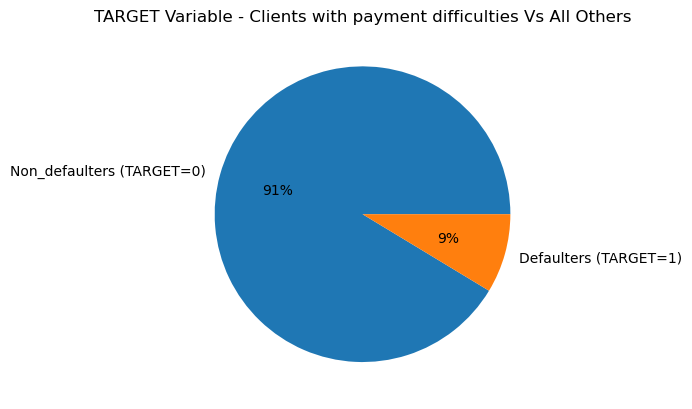

In [103]:
plt.figure()
plt.pie(new_app_1['TARGET'].value_counts(normalize=True)*100,labels=['Non_defaulters (TARGET=0)','Defaulters (TARGET=1)'],autopct='%1.f%%')
plt.title('TARGET Variable - Clients with payment difficulties Vs All Others')
plt.show()

Segregating the dataset into based upon 'Target' value.

In [104]:
target0=new_app_1.loc[new_app_1.TARGET ==0]
target1=new_app_1.loc[new_app_1.TARGET ==1]

In [105]:
len(target0)/len(target1)

10.547378062743302

The Imbalance Ratio is 10.55

## Univariate Analysis

Plotting for Income ranges across Genders for bot Defaulters and Non-Defaulers

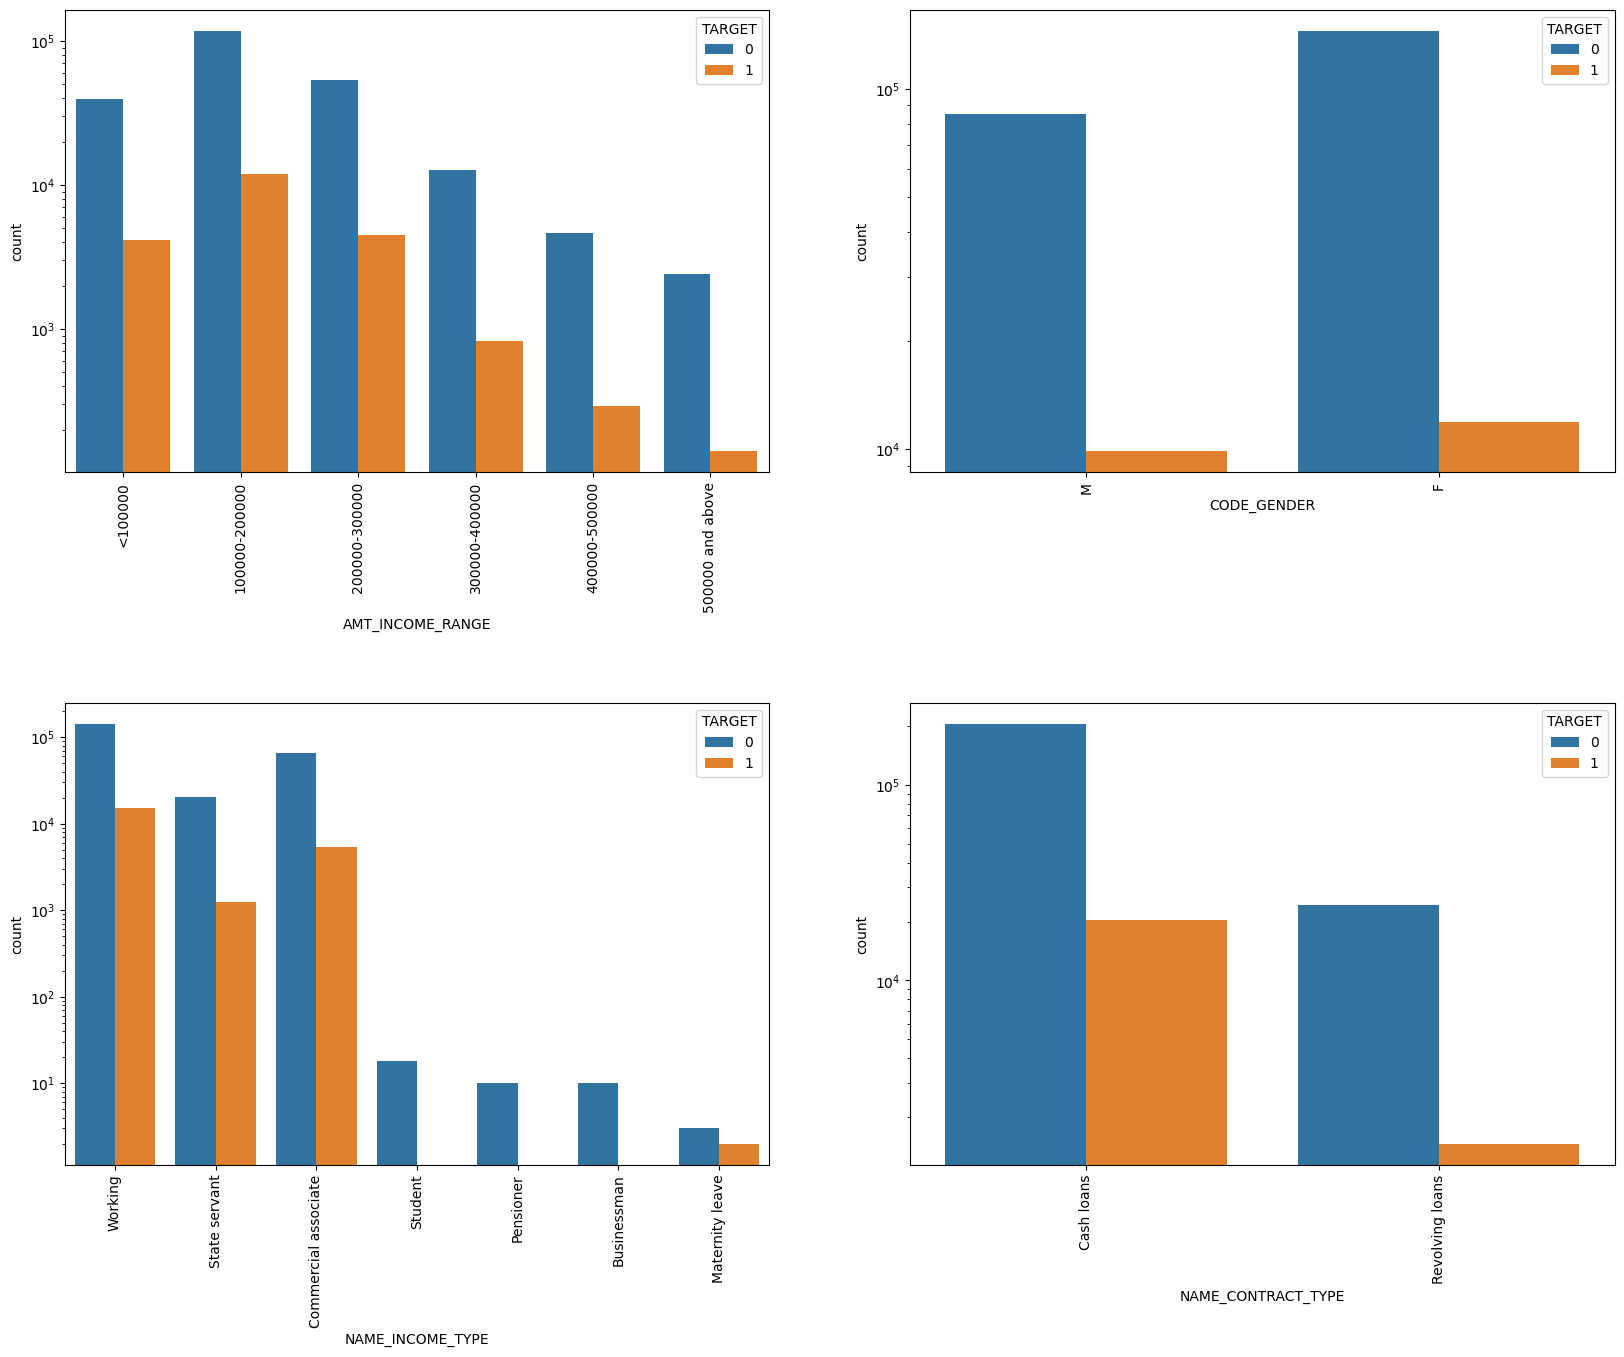

In [106]:
flow = ['AMT_INCOME_RANGE','CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(flow):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = new_app_1)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

### Inferences 
 
 For AMT_INCOME_RANGE :

- Range 100000-200000 has highest numer of Defaulters and Non-Defaulters so it seems that people in this income trange take more loans

- For Income segment above 500000 there are significantly low number of defaulters.

For CODE_GENDER:

- The Percentage of defaulters are more Male than Female

For NAME_INCOME_TYPE:

- Business People have higher percentage of loan repayment this is also true for Students but it may be that students take less loans so have lower number of Defaulters.
- Seems Working, State servent and Commercial associates take more loans as they are higher in percentage for both defaulters and Non Defaulters.


For NAME_CONTRACT_TYPE

- People Default more on cash loans than on Revolving Loans.
- Also People take more Cash loans than revolving Loans.

### Finding Outliers 

#### Non_defaulters (Target0)

In [119]:
# Income Amount

target0.AMT_INCOME_TOTAL.describe()

count    2.303020e+05
mean     1.764984e+05
std      1.154998e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.160000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [136]:
target0.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50    157500.0
0.70    202500.0
0.90    279000.0
0.95    360000.0
0.99    540000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [137]:
target0.AMT_INCOME_TOTAL.max()

18000090.0

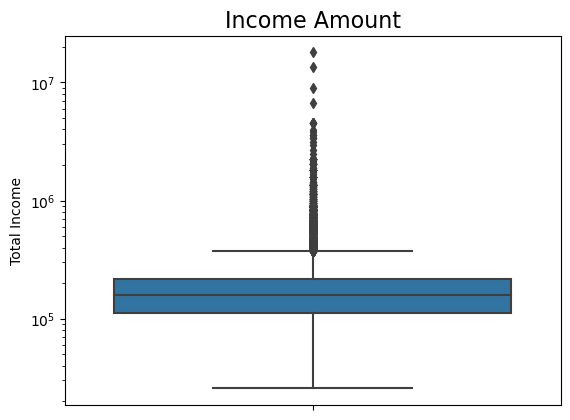

In [132]:
plt.figure()
sns.boxplot(data = target0,y = 'AMT_INCOME_TOTAL')
plt.yscale('log')
plt.ylabel('Total Income')
plt.title('Income Amount')
plt.show()

Inferences
- There seems to be equal distribution on Income
-  Due to the large difference between max value and 99th percentile Some outliers are Present

In [127]:
# Credit Amount

target0.AMT_CREDIT.describe()

count    2.303020e+05
mean     6.164879e+05
std      4.114378e+05
min      4.500000e+04
25%      2.762775e+05
50%      5.212800e+05
75%      8.353800e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [139]:
target0.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50     521280.0
0.70     769500.0
0.90    1189710.0
0.95    1350000.0
0.99    1928304.0
Name: AMT_CREDIT, dtype: float64

In [140]:
target0.AMT_CREDIT.mean()

616487.9407690772

In [138]:
target0.AMT_CREDIT.max()

4050000.0

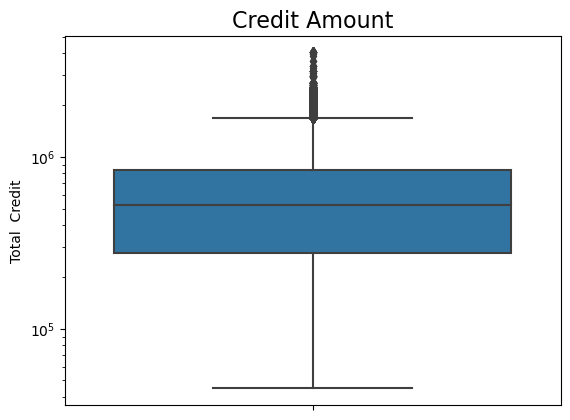

In [133]:
plt.figure()
sns.boxplot(data = target0,y = 'AMT_CREDIT')
plt.yscale('log')
plt.title('Credit Amount')
plt.ylabel('Total  Credit')
plt.show()

-  Most of The client credit inFirst Quartile as it is bigger
- Because of Difference between Mean and median also the max value Seems to be some outliers are present

In [134]:
# AMT_ANUUITY

target0.AMT_ANNUITY.describe()

count    230302.000000
mean      27902.554759
std       14833.644504
min        1980.000000
25%       16969.500000
50%       25843.500000
75%       35743.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [141]:
target0.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50    25843.5
0.70    32998.5
0.90    47178.0
0.95    54153.0
0.99    71599.5
Name: AMT_ANNUITY, dtype: float64

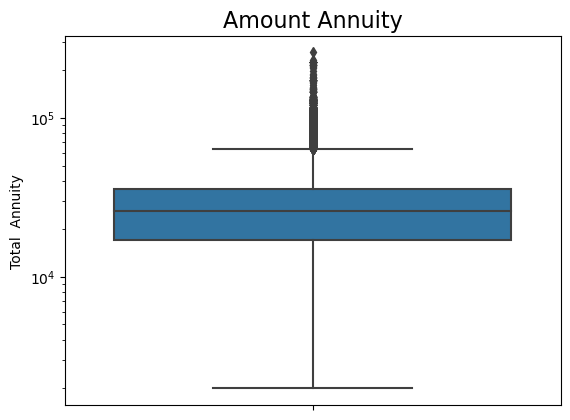

In [135]:
plt.figure()
sns.boxplot(data = target0,y = 'AMT_ANNUITY')
plt.yscale('log')
plt.title('Amount Annuity')
plt.ylabel('Total  Annuity')
plt.show()

- Outliers are present , max value is almost 3 times the 99th perecntile 

#### Defaulters (Target1)

In [142]:
# Income Amount

target1.AMT_INCOME_TOTAL.describe()

count    2.183500e+04
mean     1.697506e+05
std      7.956149e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [143]:
target1.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50    144000.0
0.70    180000.0
0.90    270000.0
0.95    315000.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [144]:
target1.AMT_INCOME_TOTAL.max()

117000000.0

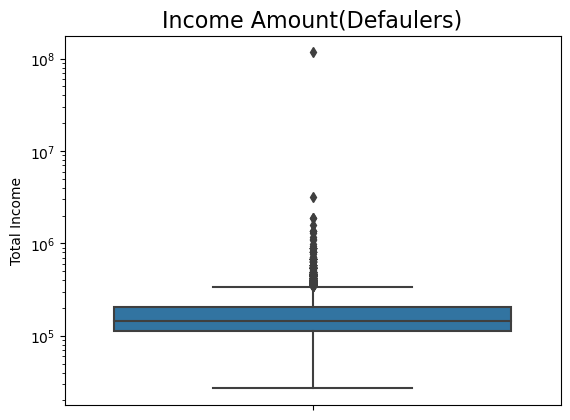

In [145]:
plt.figure()
sns.boxplot(data = target1,y = 'AMT_INCOME_TOTAL')
plt.yscale('log')
plt.ylabel('Total Income')
plt.title('Income Amount(Defaulers)')
plt.show()

- Again SIgnificant prenece of outliers is revealed from the fact that max value is more than twice the 99th percentile 
- Most income is concentrated in the third quartile

In [147]:
# Credit Amount

target1.AMT_CREDIT.describe()

count    2.183500e+04
mean     5.577178e+05
std      3.460483e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.959855e+05
75%      7.290000e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

In [148]:
target1.AMT_CREDIT.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50     495985.50
0.70     668304.00
0.90    1045602.00
0.95    1256400.00
0.99    1721697.03
Name: AMT_CREDIT, dtype: float64

In [149]:
target1.AMT_CREDIT.mean()

557717.7542706664

In [150]:
target1.AMT_CREDIT.max()

4027680.0

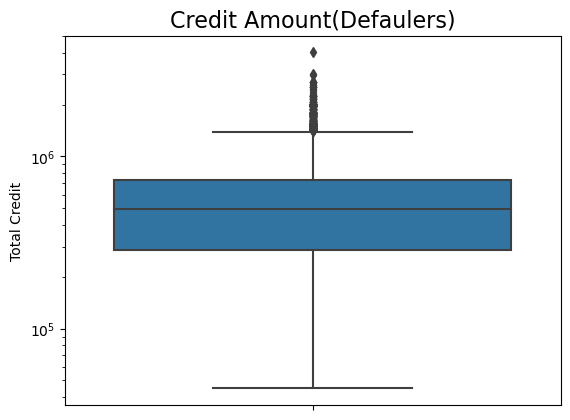

In [146]:
plt.figure()
sns.boxplot(data = target1,y = 'AMT_CREDIT')
plt.yscale('log')
plt.ylabel('Total Credit')
plt.title('Credit Amount(Defaulers)')
plt.show()

- Most Credit Data Lies in the First Quartile.
- Some Outliers seem to be present

In [152]:
# AMT_ANUUITY

target1.AMT_ANNUITY.describe()

count     21835.000000
mean      26859.040669
std       12476.177108
min        2844.000000
25%       17732.250000
50%       25578.000000
75%       33394.500000
max      127507.500000
Name: AMT_ANNUITY, dtype: float64

In [153]:
target1.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95,0.99])

0.50    25578.0
0.70    31500.0
0.90    42957.9
0.95    50657.4
0.99    62613.0
Name: AMT_ANNUITY, dtype: float64

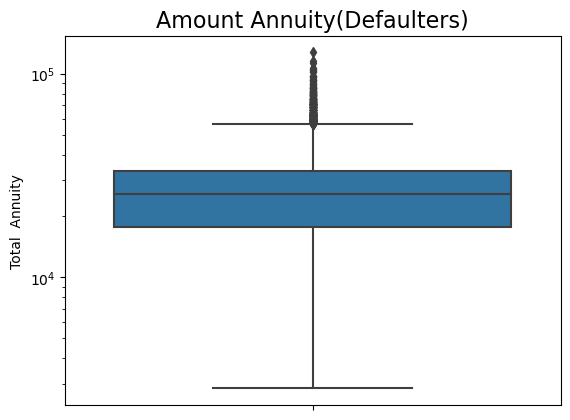

In [154]:
plt.figure()
sns.boxplot(data = target1,y = 'AMT_ANNUITY')
plt.yscale('log')
plt.title('Amount Annuity(Defaulters)')
plt.ylabel('Total  Annuity')
plt.show()

- Some outliers may be present in the dataset because of the large difference between 90th percentile and max value
- Most Values are concentrated in teh first Quartile

## Calculating the Correlation

#### For Non-Defaulters

In [107]:
target0_corr = target0.iloc[0:,2:].corr()
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.009826   -0.018704   
AMT_INCOME_TOTAL                -0.009826          1.000000    0.326155   
AMT_CREDIT                      -0.018704          0.326155    1.000000   
AMT_ANNUITY                     -0.007612          0.400752    0.762103   
AMT_GOODS_PRICE                 -0.022277          0.333217    0.986315   
REGION_POPULATION_RELATIVE      -0.030352          0.169306    0.103876   
DAYS_BIRTH                      -0.242462          0.045543    0.152659   
DAYS_EMPLOYED                   -0.063036          0.030102    0.087500   
DAYS_REGISTRATION               -0.162900         -0.034508    0.015180   
DAYS_ID_PUBLISH                  0.117746          0.026462    0.034914   
CNT_FAM_MEMBERS                  0.893276         -0.003133    0.036760   
HOUR_APPR_PROCESS_START         -0.033031          0.055934    0.040390   
REG_REGION_NOT_LIVE_REGION      -0.023033          0.064868    0.020979   
REG_REGION_NOT_WORK_REGION      -0.016798          0.129765    0.050597   
LIVE_REGION_NOT_WORK_REGION     -0.006946          0.121288    0.052028   
REG_CITY_NOT_LIVE_CITY          -0.001566         -0.004264   -0.037527   
REG_CITY_NOT_WORK_CITY           0.010369         -0.020260   -0.038517   
LIVE_CITY_NOT_WORK_CITY          0.018414         -0.011238   -0.014834   
EXT_SOURCE_2                    -0.026115          0.137697    0.135976   
OBS_30_CNT_SOCIAL_CIRCLE         0.019388         -0.030661   -0.003803   
DEF_30_CNT_SOCIAL_CIRCLE         0.003419         -0.027914   -0.022223   
OBS_60_CNT_SOCIAL_CIRCLE         0.019062         -0.030477   -0.003770   
DEF_60_CNT_SOCIAL_CIRCLE         0.002384         -0.027415   -0.024255   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001019          0.002664   -0.002694   
AMT_REQ_CREDIT_BUREAU_DAY        0.000660          0.009039    0.006213   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000047          0.009068    0.000279   
AMT_REQ_CREDIT_BUREAU_MON       -0.017476          0.054560    0.054174   
AMT_REQ_CREDIT_BUREAU_QRT       -0.000453          0.016234    0.022967   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.026209          0.029980   -0.039400   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   -0.007612        -0.022277   
AMT_INCOME_TOTAL                0.400752         0.333217   
AMT_CREDIT                      0.762103         0.986315   
AMT_ANNUITY                     1.000000         0.766464   
AMT_GOODS_PRICE                 0.766464         1.000000   
REGION_POPULATION_RELATIVE      0.122206         0.106988   
DAYS_BIRTH                      0.091571         0.146764   
DAYS_EMPLOYED                   0.052470         0.088601   
DAYS_REGISTRATION              -0.009814         0.011840   
DAYS_ID_PUBLISH                 0.025990         0.036679   
CNT_FAM_MEMBERS                 0.041231         0.034889   
HOUR_APPR_PROCESS_START         0.034038         0.049964   
REG_REGION_NOT_LIVE_REGION      0.039753         0.023522   
REG_REGION_NOT_WORK_REGION      0.076045         0.052040   
LIVE_REGION_NOT_WORK_REGION     0.071623         0.052319   
REG_CITY_NOT_LIVE_CITY         -0.018912        -0.036935   
REG_CITY_NOT_WORK_CITY         -0.028971        -0.039240   
LIVE_CITY_NOT_WORK_CITY        -0.014268        -0.015803   
EXT_SOURCE_2                    0.126920         0.142381   
OBS_30_CNT_SOCIAL_CIRCLE       -0.016426        -0.003960   
DEF_30_CNT_SOCIAL_CIRCLE       -0.023286        -0.023445   
OBS_60_CNT_SOCIAL_CIRCLE       -0.016241        -0.003970   
DEF_60_CNT_SOCIAL_CIRCLE       -0.024129        -0.025066   
AMT_REQ_CREDIT_BUREAU_HOUR      0.003876        -0.002259   
AMT_REQ_CREDIT_BUREAU_DAY       0.003148         0.006563   
AMT_REQ_CREDIT_BUREAU_WEEK      0.013904         0.000791   
AMT_REQ_CREDIT_BUREAU_MON       0.033052         0.055770   
AMT_REQ_CREDIT_BUREAU_QRT       0.014217         0.023351   
AMT_REQ_C

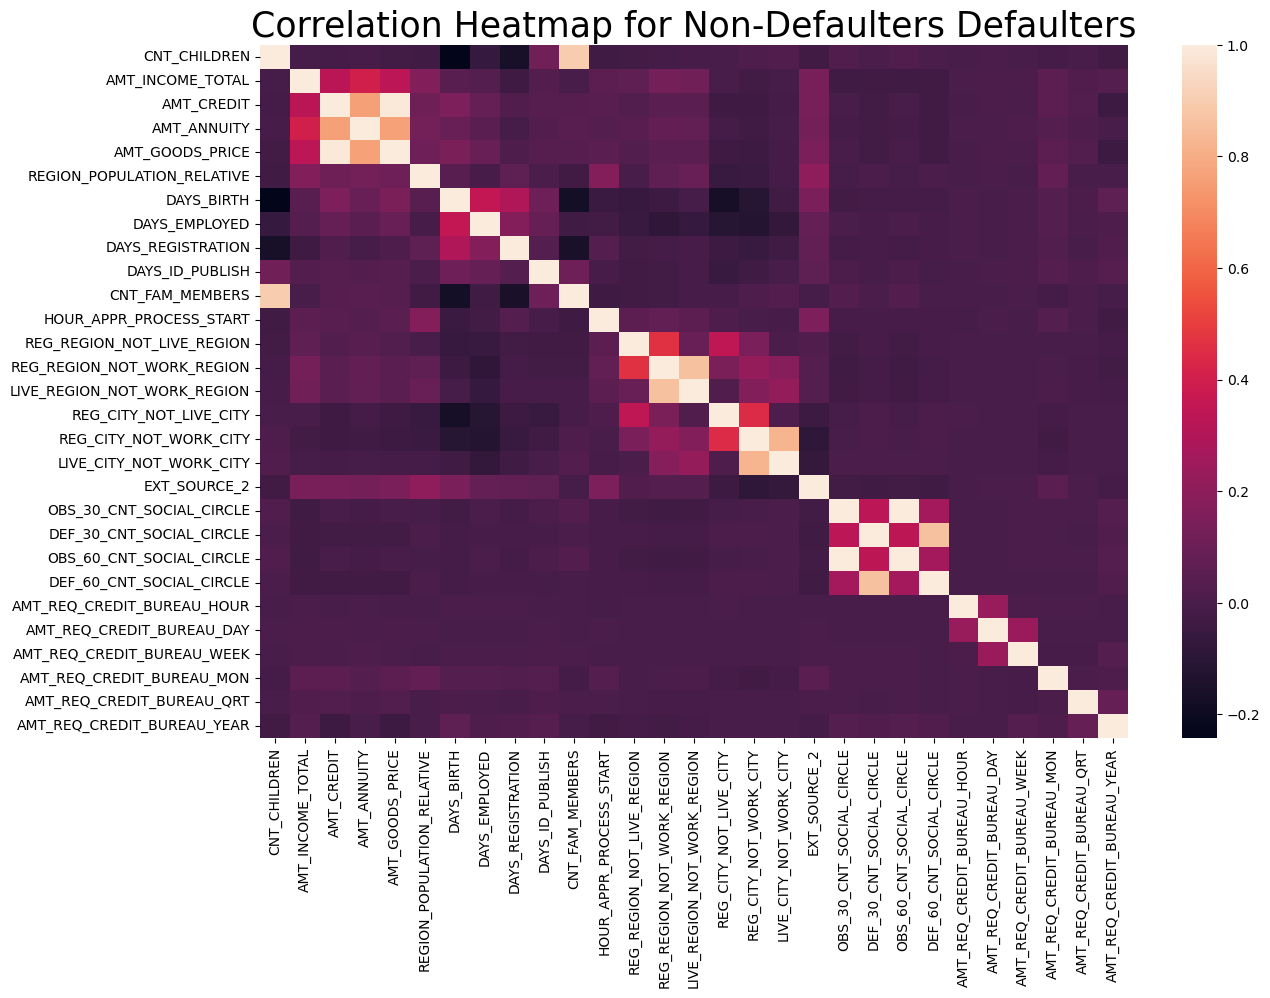

In [108]:
# plotting the correlation

plt.figure(figsize = (14,9))
sns.heatmap(target0_corr,annot = False)
plt.title('Correlation Heatmap for Non-Defaulters Defaulters',fontsize = 25)
plt.show()

Points to be concluded from the graph presented before.
 - Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
 - Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
 - Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
less children client have in densely populated area.
 - Credit amount is higher to densely populated area.
 - The income is also higher in densely populated area.

#### For Defaulters

In [109]:
target1_corr = target1.iloc[0:,2:].corr()
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                 0.001872          1.000000    0.036484   
AMT_CREDIT                      -0.002074          0.036484    1.000000   
AMT_ANNUITY                      0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                 -0.007707          0.036086    0.982239   
REGION_POPULATION_RELATIVE      -0.032019          0.008476    0.069220   
DAYS_BIRTH                      -0.176563          0.007822    0.189512   
DAYS_EMPLOYED                   -0.032627          0.000039    0.106003   
DAYS_REGISTRATION               -0.126411          0.003959    0.033250   
DAYS_ID_PUBLISH                  0.089861          0.008858    0.062405   
CNT_FAM_MEMBERS                  0.893829          0.003692    0.045420   
HOUR_APPR_PROCESS_START         -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION      -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION      -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION     -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY          -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY          -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY          0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                    -0.010481          0.006151    0.126360   
OBS_30_CNT_SOCIAL_CIRCLE         0.028712         -0.005866    0.015835   
DEF_30_CNT_SOCIAL_CIRCLE         0.002959         -0.005849   -0.031869   
OBS_60_CNT_SOCIAL_CIRCLE         0.027955         -0.005765    0.016319   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003220         -0.005282   -0.035170   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001269          0.000925   -0.005051   
AMT_REQ_CREDIT_BUREAU_DAY       -0.008695         -0.000071   -0.000943   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.006195          0.000885    0.013307   
AMT_REQ_CREDIT_BUREAU_MON       -0.015163          0.005141    0.061456   
AMT_REQ_CREDIT_BUREAU_QRT       -0.011841          0.000607   -0.003275   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.021265          0.003328   -0.021945   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.015653        -0.007707   
AMT_INCOME_TOTAL                0.043358         0.036086   
AMT_CREDIT                      0.748708         0.982239   
AMT_ANNUITY                     1.000000         0.748651   
AMT_GOODS_PRICE                 0.748651         1.000000   
REGION_POPULATION_RELATIVE      0.074406         0.076210   
DAYS_BIRTH                      0.090497         0.185486   
DAYS_EMPLOYED                   0.049032         0.111906   
DAYS_REGISTRATION              -0.014302         0.032067   
DAYS_ID_PUBLISH                 0.044289         0.064666   
CNT_FAM_MEMBERS                 0.054884         0.042147   
HOUR_APPR_PROCESS_START         0.022524         0.042280   
REG_REGION_NOT_LIVE_REGION      0.033311         0.023532   
REG_REGION_NOT_WORK_REGION      0.063242         0.039387   
LIVE_REGION_NOT_WORK_REGION     0.061609         0.038453   
REG_CITY_NOT_LIVE_CITY         -0.013834        -0.035652   
REG_CITY_NOT_WORK_CITY         -0.019728        -0.041491   
LIVE_CITY_NOT_WORK_CITY        -0.006806        -0.017052   
EXT_SOURCE_2                    0.119990         0.137162   
OBS_30_CNT_SOCIAL_CIRCLE       -0.000018         0.016710   
DEF_30_CNT_SOCIAL_CIRCLE       -0.024644        -0.027045   
OBS_60_CNT_SOCIAL_CIRCLE        0.001216         0.017255   
DEF_60_CNT_SOCIAL_CIRCLE       -0.027918        -0.029544   
AMT_REQ_CREDIT_BUREAU_HOUR      0.010425        -0.004194   
AMT_REQ_CREDIT_BUREAU_DAY      -0.001406         0.000755   
AMT_REQ_CREDIT_BUREAU_WEEK      0.034566         0.015111   
AMT_REQ_CREDIT_BUREAU_MON       0.051267         0.064831   
AMT_REQ_CREDIT_BUREAU_QRT      -0.002792        -0.002224   
AMT_REQ_C

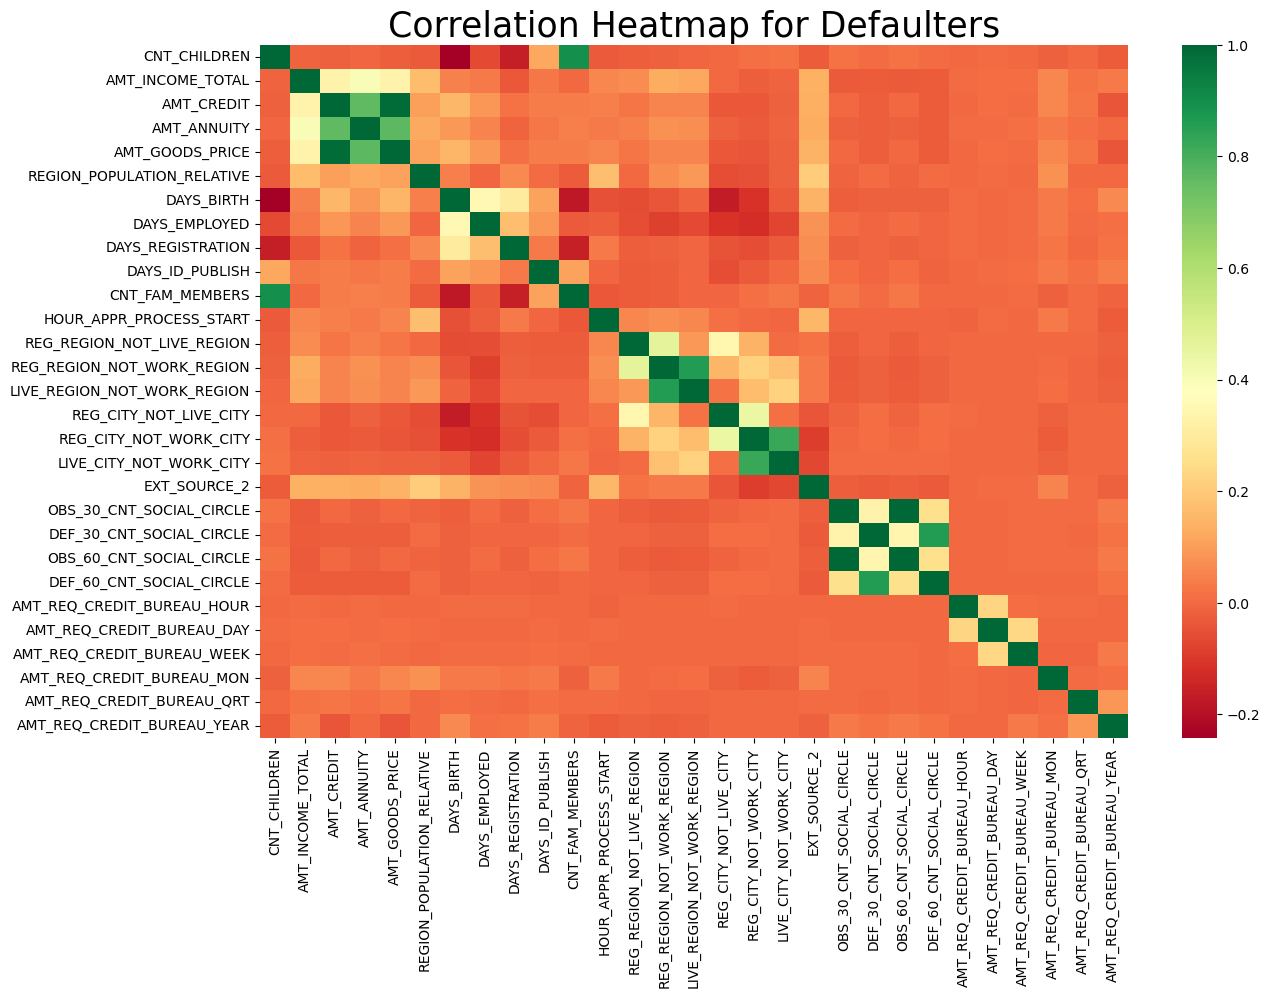

In [110]:
# plotting the correlation

plt.figure(figsize = (14,9))
sns.heatmap(target0_corr,annot = False,cmap = 'RdYlGn')
plt.title('Correlation Heatmap for Defaulters',fontsize = 25)
plt.show()

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.
  - The client's permanent address does not match contact address are having less children and vice-versa
  - The client's permanent address does not match work address are having less children and vice-versa


### Top 10 Correlation for Target 0 and Target 1

#### Targert0

In [111]:
target0_corr = target0.iloc[0:,2:].corr()
target0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.009826   -0.018704   
AMT_INCOME_TOTAL                -0.009826          1.000000    0.326155   
AMT_CREDIT                      -0.018704          0.326155    1.000000   
AMT_ANNUITY                     -0.007612          0.400752    0.762103   
AMT_GOODS_PRICE                 -0.022277          0.333217    0.986315   
REGION_POPULATION_RELATIVE      -0.030352          0.169306    0.103876   
DAYS_BIRTH                      -0.242462          0.045543    0.152659   
DAYS_EMPLOYED                   -0.063036          0.030102    0.087500   
DAYS_REGISTRATION               -0.162900         -0.034508    0.015180   
DAYS_ID_PUBLISH                  0.117746          0.026462    0.034914   
CNT_FAM_MEMBERS                  0.893276         -0.003133    0.036760   
HOUR_APPR_PROCESS_START         -0.033031          0.055934    0.040390   
REG_REGION_NOT_LIVE_REGION      -0.023033          0.064868    0.020979   
REG_REGION_NOT_WORK_REGION      -0.016798          0.129765    0.050597   
LIVE_REGION_NOT_WORK_REGION     -0.006946          0.121288    0.052028   
REG_CITY_NOT_LIVE_CITY          -0.001566         -0.004264   -0.037527   
REG_CITY_NOT_WORK_CITY           0.010369         -0.020260   -0.038517   
LIVE_CITY_NOT_WORK_CITY          0.018414         -0.011238   -0.014834   
EXT_SOURCE_2                    -0.026115          0.137697    0.135976   
OBS_30_CNT_SOCIAL_CIRCLE         0.019388         -0.030661   -0.003803   
DEF_30_CNT_SOCIAL_CIRCLE         0.003419         -0.027914   -0.022223   
OBS_60_CNT_SOCIAL_CIRCLE         0.019062         -0.030477   -0.003770   
DEF_60_CNT_SOCIAL_CIRCLE         0.002384         -0.027415   -0.024255   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001019          0.002664   -0.002694   
AMT_REQ_CREDIT_BUREAU_DAY        0.000660          0.009039    0.006213   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000047          0.009068    0.000279   
AMT_REQ_CREDIT_BUREAU_MON       -0.017476          0.054560    0.054174   
AMT_REQ_CREDIT_BUREAU_QRT       -0.000453          0.016234    0.022967   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.026209          0.029980   -0.039400   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   -0.007612        -0.022277   
AMT_INCOME_TOTAL                0.400752         0.333217   
AMT_CREDIT                      0.762103         0.986315   
AMT_ANNUITY                     1.000000         0.766464   
AMT_GOODS_PRICE                 0.766464         1.000000   
REGION_POPULATION_RELATIVE      0.122206         0.106988   
DAYS_BIRTH                      0.091571         0.146764   
DAYS_EMPLOYED                   0.052470         0.088601   
DAYS_REGISTRATION              -0.009814         0.011840   
DAYS_ID_PUBLISH                 0.025990         0.036679   
CNT_FAM_MEMBERS                 0.041231         0.034889   
HOUR_APPR_PROCESS_START         0.034038         0.049964   
REG_REGION_NOT_LIVE_REGION      0.039753         0.023522   
REG_REGION_NOT_WORK_REGION      0.076045         0.052040   
LIVE_REGION_NOT_WORK_REGION     0.071623         0.052319   
REG_CITY_NOT_LIVE_CITY         -0.018912        -0.036935   
REG_CITY_NOT_WORK_CITY         -0.028971        -0.039240   
LIVE_CITY_NOT_WORK_CITY        -0.014268        -0.015803   
EXT_SOURCE_2                    0.126920         0.142381   
OBS_30_CNT_SOCIAL_CIRCLE       -0.016426        -0.003960   
DEF_30_CNT_SOCIAL_CIRCLE       -0.023286        -0.023445   
OBS_60_CNT_SOCIAL_CIRCLE       -0.016241        -0.003970   
DEF_60_CNT_SOCIAL_CIRCLE       -0.024129        -0.025066   
AMT_REQ_CREDIT_BUREAU_HOUR      0.003876        -0.002259   
AMT_REQ_CREDIT_BUREAU_DAY       0.003148         0.006563   
AMT_REQ_CREDIT_BUREAU_WEEK      0.013904         0.000791   
AMT_REQ_CREDIT_BUREAU_MON       0.033052         0.055770   
AMT_REQ_CREDIT_BUREAU_QRT       0.014217         0.023351   
AMT_REQ_C

In [112]:
# Converting negative values to positive and sorting

corr0 = target0_corr.abs().unstack().sort_values(kind = 'quicksort').dropna()
corr0 = corr0[corr0 !=1.0]
corr0

AMT_REQ_CREDIT_BUREAU_DAY    CNT_FAM_MEMBERS                0.000022
CNT_FAM_MEMBERS              AMT_REQ_CREDIT_BUREAU_DAY      0.000022
AMT_REQ_CREDIT_BUREAU_WEEK   CNT_CHILDREN                   0.000047
CNT_CHILDREN                 AMT_REQ_CREDIT_BUREAU_WEEK     0.000047
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_60_CNT_SOCIAL_CIRCLE       0.000071
OBS_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000071
DEF_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_WEEK     0.000095
AMT_REQ_CREDIT_BUREAU_WEEK   DEF_60_CNT_SOCIAL_CIRCLE       0.000095
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_30_CNT_SOCIAL_CIRCLE       0.000204
OBS_30_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000204
DEF_30_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_WEEK     0.000210
AMT_REQ_CREDIT_BUREAU_WEEK   DEF_30_CNT_SOCIAL_CIRCLE       0.000210
DAYS_BIRTH                   AMT_REQ_CREDIT_BUREAU_HOUR     0.000236
AMT_REQ_CREDIT_BUREAU_HOUR   DAYS_BIRTH                     0.000236
AMT_REQ_CREDIT_BUREAU_WEEK   REG_R

In [113]:
# Top 10 Corr values for target 0 will be

corr0.tail(10)

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860421
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861454
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861454
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893276
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893276
AMT_GOODS_PRICE              AMT_CREDIT                     0.986315
AMT_CREDIT                   AMT_GOODS_PRICE                0.986315
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998491
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998491
dtype: float64

#### Target1

In [114]:
target1_corr = target1.iloc[0:,2:].corr()
target1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                 0.001872          1.000000    0.036484   
AMT_CREDIT                      -0.002074          0.036484    1.000000   
AMT_ANNUITY                      0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                 -0.007707          0.036086    0.982239   
REGION_POPULATION_RELATIVE      -0.032019          0.008476    0.069220   
DAYS_BIRTH                      -0.176563          0.007822    0.189512   
DAYS_EMPLOYED                   -0.032627          0.000039    0.106003   
DAYS_REGISTRATION               -0.126411          0.003959    0.033250   
DAYS_ID_PUBLISH                  0.089861          0.008858    0.062405   
CNT_FAM_MEMBERS                  0.893829          0.003692    0.045420   
HOUR_APPR_PROCESS_START         -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION      -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION      -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION     -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY          -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY          -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY          0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                    -0.010481          0.006151    0.126360   
OBS_30_CNT_SOCIAL_CIRCLE         0.028712         -0.005866    0.015835   
DEF_30_CNT_SOCIAL_CIRCLE         0.002959         -0.005849   -0.031869   
OBS_60_CNT_SOCIAL_CIRCLE         0.027955         -0.005765    0.016319   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003220         -0.005282   -0.035170   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001269          0.000925   -0.005051   
AMT_REQ_CREDIT_BUREAU_DAY       -0.008695         -0.000071   -0.000943   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.006195          0.000885    0.013307   
AMT_REQ_CREDIT_BUREAU_MON       -0.015163          0.005141    0.061456   
AMT_REQ_CREDIT_BUREAU_QRT       -0.011841          0.000607   -0.003275   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.021265          0.003328   -0.021945   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.015653        -0.007707   
AMT_INCOME_TOTAL                0.043358         0.036086   
AMT_CREDIT                      0.748708         0.982239   
AMT_ANNUITY                     1.000000         0.748651   
AMT_GOODS_PRICE                 0.748651         1.000000   
REGION_POPULATION_RELATIVE      0.074406         0.076210   
DAYS_BIRTH                      0.090497         0.185486   
DAYS_EMPLOYED                   0.049032         0.111906   
DAYS_REGISTRATION              -0.014302         0.032067   
DAYS_ID_PUBLISH                 0.044289         0.064666   
CNT_FAM_MEMBERS                 0.054884         0.042147   
HOUR_APPR_PROCESS_START         0.022524         0.042280   
REG_REGION_NOT_LIVE_REGION      0.033311         0.023532   
REG_REGION_NOT_WORK_REGION      0.063242         0.039387   
LIVE_REGION_NOT_WORK_REGION     0.061609         0.038453   
REG_CITY_NOT_LIVE_CITY         -0.013834        -0.035652   
REG_CITY_NOT_WORK_CITY         -0.019728        -0.041491   
LIVE_CITY_NOT_WORK_CITY        -0.006806        -0.017052   
EXT_SOURCE_2                    0.119990         0.137162   
OBS_30_CNT_SOCIAL_CIRCLE       -0.000018         0.016710   
DEF_30_CNT_SOCIAL_CIRCLE       -0.024644        -0.027045   
OBS_60_CNT_SOCIAL_CIRCLE        0.001216         0.017255   
DEF_60_CNT_SOCIAL_CIRCLE       -0.027918        -0.029544   
AMT_REQ_CREDIT_BUREAU_HOUR      0.010425        -0.004194   
AMT_REQ_CREDIT_BUREAU_DAY      -0.001406         0.000755   
AMT_REQ_CREDIT_BUREAU_WEEK      0.034566         0.015111   
AMT_REQ_CREDIT_BUREAU_MON       0.051267         0.064831   
AMT_REQ_CREDIT_BUREAU_QRT      -0.002792        -0.002224   
AMT_REQ_C

In [115]:
# Converting negative values to positive and sorting

corr1 = target1_corr.abs().unstack().sort_values(kind = 'quicksort').dropna()
corr1 = corr1[corr1 !=1.0]
corr1

AMT_ANNUITY                  OBS_30_CNT_SOCIAL_CIRCLE       0.000018
OBS_30_CNT_SOCIAL_CIRCLE     AMT_ANNUITY                    0.000018
DAYS_EMPLOYED                AMT_INCOME_TOTAL               0.000039
AMT_INCOME_TOTAL             DAYS_EMPLOYED                  0.000039
                             AMT_REQ_CREDIT_BUREAU_DAY      0.000071
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000071
HOUR_APPR_PROCESS_START      DAYS_EMPLOYED                  0.000092
DAYS_EMPLOYED                HOUR_APPR_PROCESS_START        0.000092
AMT_REQ_CREDIT_BUREAU_HOUR   DAYS_ID_PUBLISH                0.000149
DAYS_ID_PUBLISH              AMT_REQ_CREDIT_BUREAU_HOUR     0.000149
AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000184
DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000184
EXT_SOURCE_2                 AMT_REQ_CREDIT_BUREAU_HOUR     0.000202
AMT_REQ_CREDIT_BUREAU_HOUR   EXT_SOURCE_2                   0.000202
LIVE_CITY_NOT_WORK_CITY      AMT_R

In [116]:
corr1.tail(10)

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846872
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867963
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867963
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
AMT_GOODS_PRICE              AMT_CREDIT                     0.982239
AMT_CREDIT                   AMT_GOODS_PRICE                0.982239
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998288
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998288
dtype: float64

## MultiVariate Analysis

### Box plotting for Credit amount and Education Level
 - TArget 0

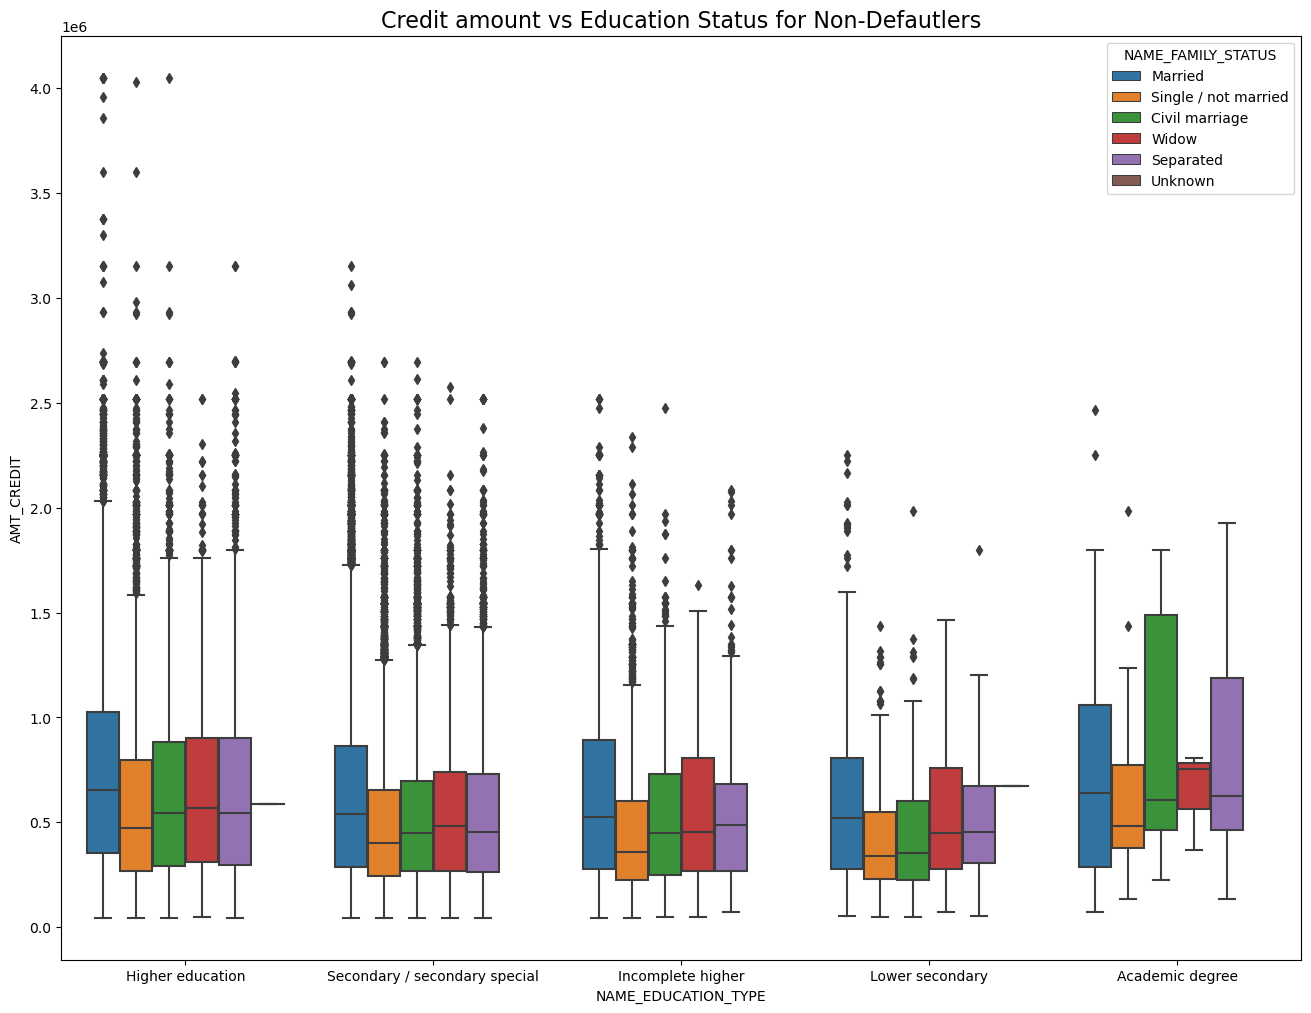

In [170]:
# Box plotting for Credit Amount for Non- Defaulers

plt.figure(figsize=(16,12))
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Non-Defautlers')
plt.show()

- Target1

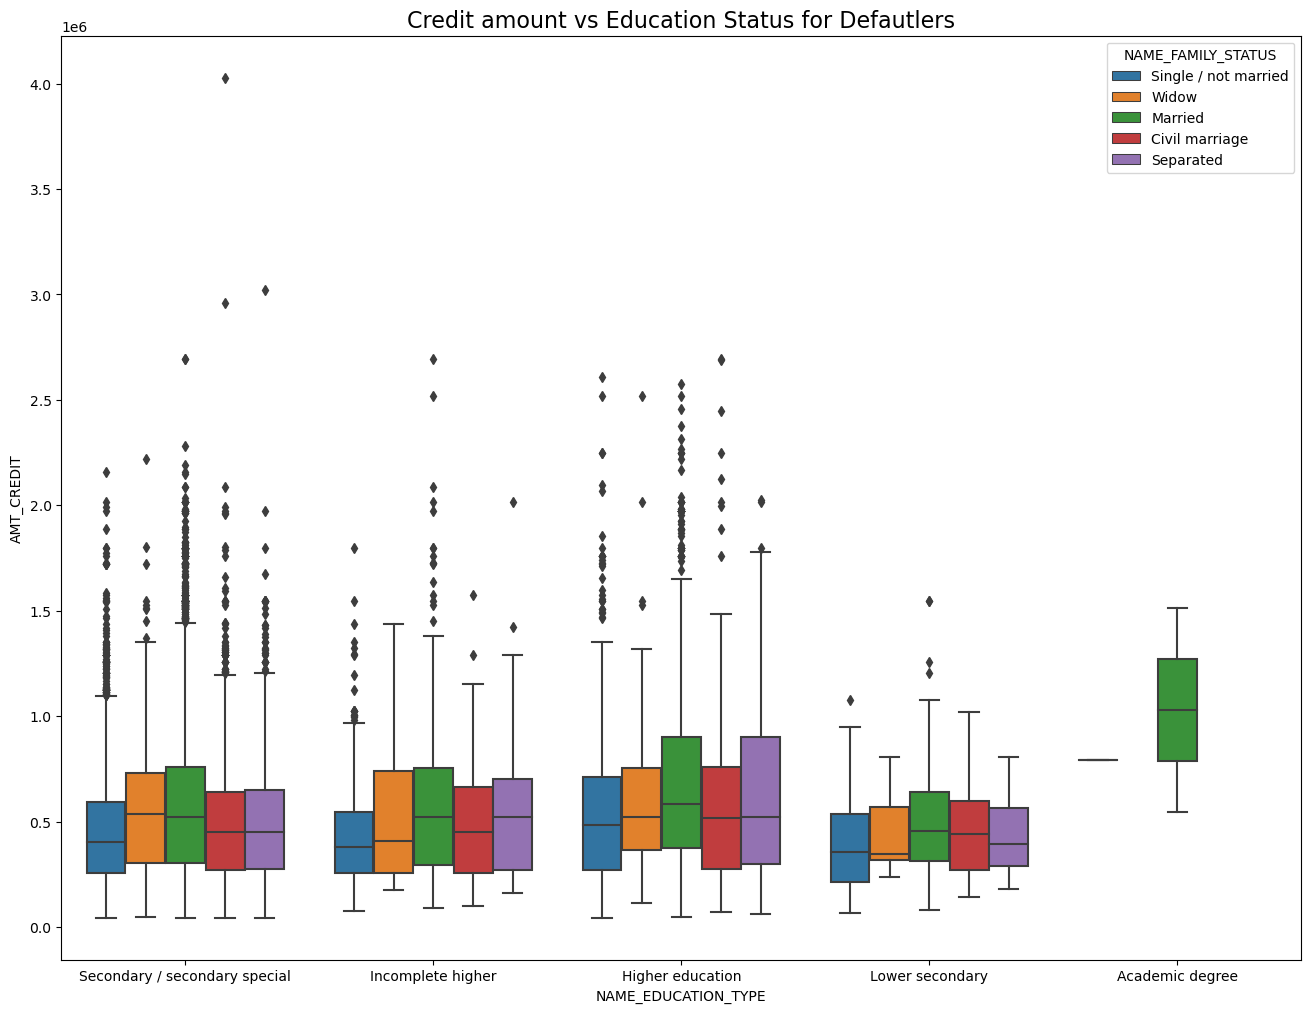

In [173]:
# Box plotting for Credit Amount for Defaulers

plt.figure(figsize=(16,12))
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Defautlers')
plt.show()

From the Above plots we can draw following Inferences.
 - People with higher education or an academic degree have higher loan credits indicating there ability to payback loans.
 - Married People in general have higher loan credit.
 - Single/Unmarried people default on loans more especially if they have lower education level.
 - Education level is proportional to ability to payback loan.


### Box Plotting for Total Income and Education level

- Target0

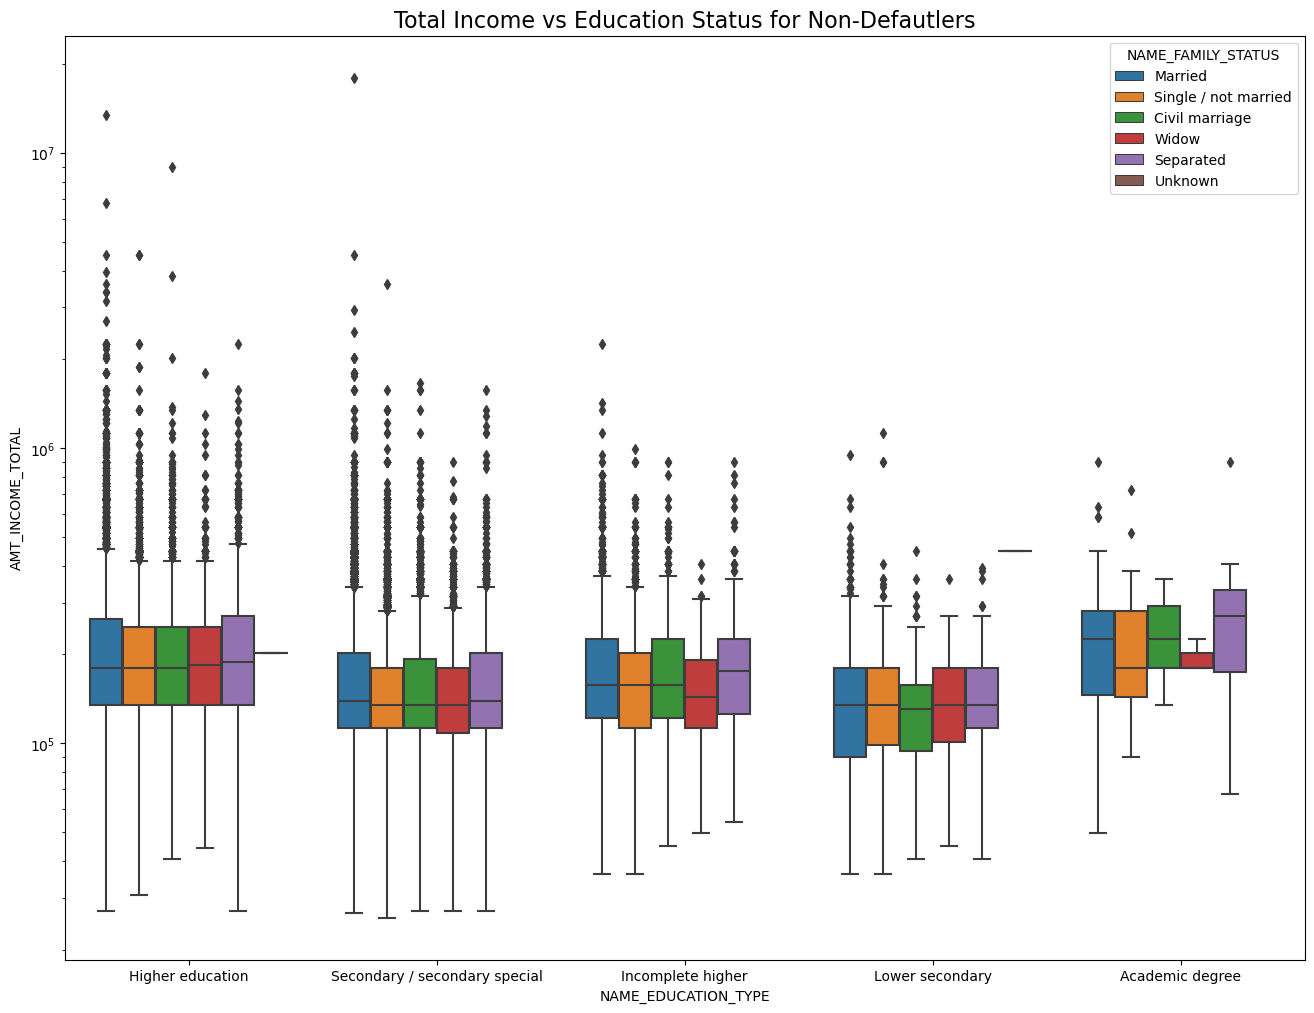

In [174]:
# Box plotting for Income amount for Non- Defaulers

plt.figure(figsize=(16,12))
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Total Income vs Education Status for Non-Defautlers')
plt.yscale('log')
plt.show()

-Target1

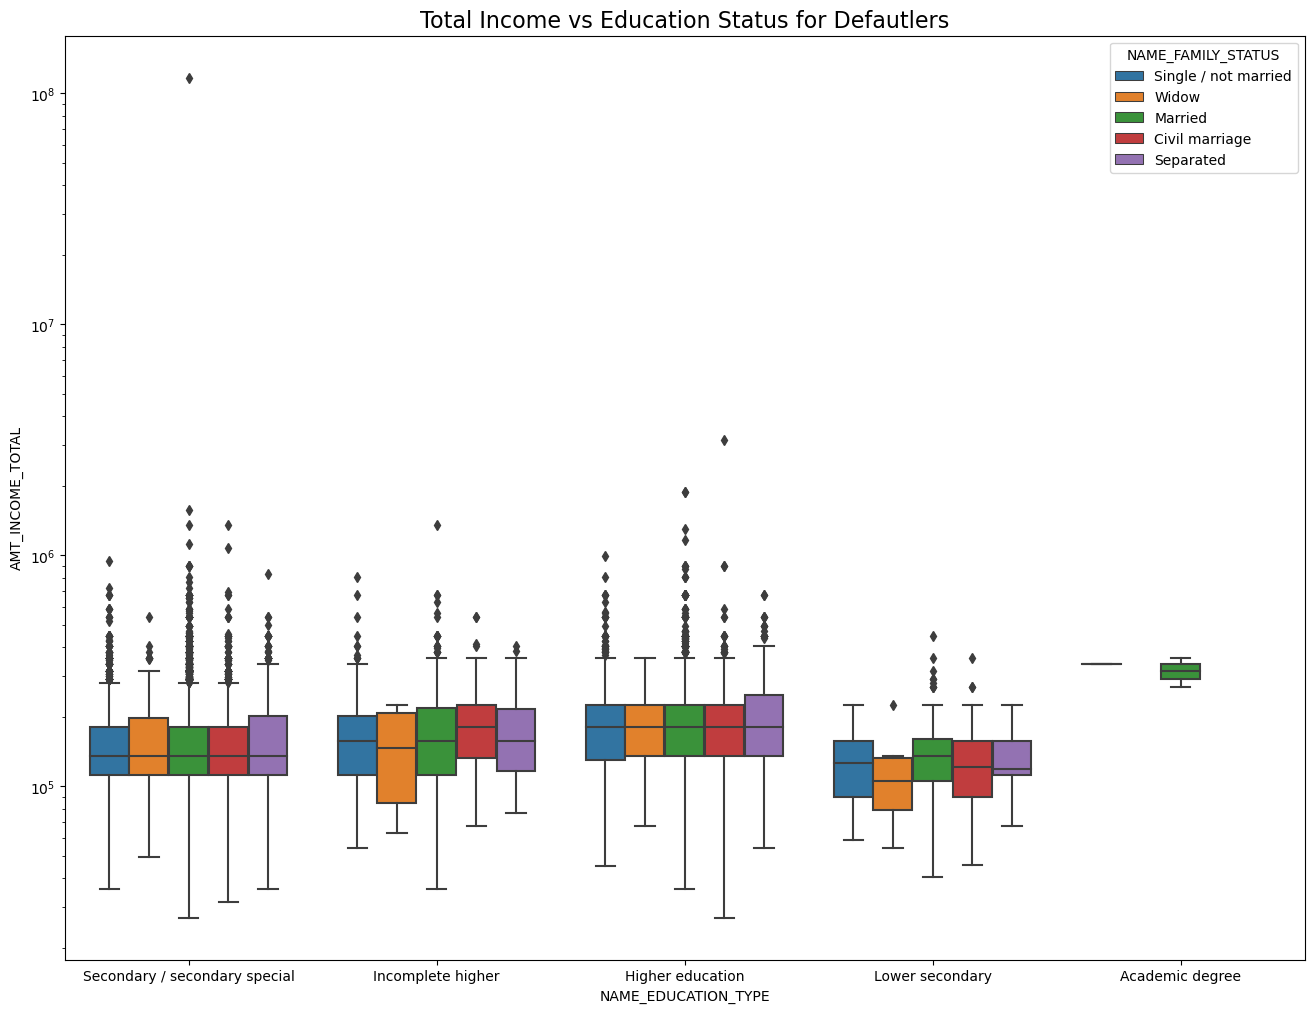

In [176]:
# Box plotting for Income amount for Defaulers

plt.figure(figsize=(16,12))
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Total Income vs Education Status for Defautlers')
plt.yscale('log')
plt.show()

Inferences - 
- It can be confirmed from both plots that Income is dependent on education level hence their ability for loan repayment
- Married People with Academic Degree have higher Income
- Extermely low numer of married people With default on their loans otherwise almost none of the people with Acadenmic degree default on loans.
- Single Peole and widowers are more prone to default on their loans.

## Working on Previous Application Dataset

In [179]:
prev_app_1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

In [180]:
# Again Checking null values in the dataset
prev_app_1.isnull().sum()/len(prev_app_1)*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716
dtype: float64

In [182]:
prev_app_1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_APPLICATION                float64
AMT_CREDIT                     float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION             object
dtype: object

- Checking NAME_CASH_LOAN_PURPOSE as it has  some XNA values

In [183]:
prev_app_1.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

Removing the XNA and XAP values from the column

In [185]:
prev_app_1 = prev_app_1.drop(prev_app_1[prev_app_1.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)
prev_app_1 = prev_app_1.drop(prev_app_1[prev_app_1.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)

In [188]:
#Rechecking the column once again 
prev_app_1.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

### Merging the Two Data Sets The Application Datset and Previous Application Dataset

In [192]:
merge_app = pd.merge(left = new_app_1, right = prev_app_1,how = 'inner', on = 'SK_ID_CURR', suffixes = '_x')
merge_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100034       0     Revolving loans           M            N   
1      100035       0          Cash loans           F            N   
2      100039       0          Cash loans           M            Y   
3      100046       0     Revolving loans           M            Y   
4      100046       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY  \
0               Y             0           90000.0     180000.0       9000.0   
1               Y             0          292500.0     665892.0      24592.5   
2               N             1          360000.0     733315.5      39069.0   
3               Y             0          180000.0     540000.0      27000.0   
4               Y             0          180000.0     540000.0      27000.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         180000.0   Unaccompanied               Working   
1         477000.0   Unaccompanied  Commercial associate   
2         679500.0   Unaccompanied  Commercial associate   
3         540000.0   Unaccompanied               Working   
4         540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755       10341           1010               4799   
1                    0.025164       15280           2668               5266   
2                    0.015221       11694           2060               3557   
3                    0.025164       16126           1761               8236   
4                    0.025164       16126           1761               8236   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START_  \
0             3015              1.0                     TUESDAY   
1             3787              2.0                   WEDNESDAY   
2             3557              3.0                    THURSDAY   
3             4292              2.0                     TUESDAY   
4             4292              2.0                     TUESDAY   

   HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
0                        16                           0   
1                        13                           0   
2                        10                           0   
3                         8                           0   
4                         8                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       1                       1                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.502779                       0.0   
1  Business Entity Type 3      0.479987                       0.0   
2

- Renaming the colums in loan merge Datset

In [201]:
merge_app = merge_app.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [202]:
merge_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100034       0    Revolving loans           M            N   
1      100035       0         Cash loans           F            N   
2      100039       0         Cash loans           M            Y   
3      100046       0    Revolving loans           M            Y   
4      100046       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0           90000.0    180000.0       9000.0   
1               Y             0          292500.0    665892.0      24592.5   
2               N             1          360000.0    733315.5      39069.0   
3               Y             0          180000.0    540000.0      27000.0   
4               Y             0          180000.0    540000.0      27000.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         180000.0   Unaccompanied               Working   
1         477000.0   Unaccompanied  Commercial associate   
2         679500.0   Unaccompanied  Commercial associate   
3         540000.0   Unaccompanied               Working   
4         540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755       10341           1010               4799   
1                    0.025164       15280           2668               5266   
2                    0.015221       11694           2060               3557   
3                    0.025164       16126           1761               8236   
4                    0.025164       16126           1761               8236   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START  \
0             3015              1.0                    TUESDAY   
1             3787              2.0                  WEDNESDAY   
2             3557              3.0                   THURSDAY   
3             4292              2.0                    TUESDAY   
4             4292              2.0                    TUESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       16                           0   
1                       13                           0   
2                       10                           0   
3                        8                           0   
4                        8                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       1                       1                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.502779                       0.0   
1  Business Entity Type 3      0.479987                       0.0   
2           Self-employed

In [203]:
#Removing unwanted columns for analysis

merge_app.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [204]:
merge_app.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       0    Revolving loans           M            N               Y   
1       0         Cash loans           F            N               Y   
2       0         Cash loans           M            Y               N   
3       0    Revolving loans           M            Y               Y   
4       0    Revolving loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0           90000.0    180000.0       9000.0         180000.0   
1             0          292500.0    665892.0      24592.5         477000.0   
2             1          360000.0    733315.5      39069.0         679500.0   
3             0          180000.0    540000.0      27000.0         540000.0   
4             0          180000.0    540000.0      27000.0         540000.0   

  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied               Working               Higher education   
1   Unaccompanied  Commercial associate  Secondary / secondary special   
2   Unaccompanied  Commercial associate  Secondary / secondary special   
3   Unaccompanied               Working               Higher education   
4   Unaccompanied               Working               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married       With parents                    0.030755   
1        Civil marriage  House / apartment                    0.025164   
2               Married  House / apartment                    0.015221   
3               Married  House / apartment                    0.025164   
4               Married  House / apartment                    0.025164   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       10341           1010               4799             3015   
1       15280           2668               5266             3787   
2       11694           2060               3557             3557   
3       16126           1761               8236             4292   
4       16126           1761               8236             4292   

   CNT_FAM_MEMBERS       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0              1.0  Business Entity Type 3      0.502779   
1              2.0  Business Entity Type 3      0.479987   
2              3.0           Self-employed      0.321745   
3              2.0  Business Entity Type 3      0.738053   
4              2.0  Business Entity Type 3      0.738053   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       2.0                       0.0   
3                       1.0                       0.0   
4                       1.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       2.0                       0.0   
3                       1.0                       0.0   
4                       1.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           0                          0   
1                           0                          1   
2                           0                          0   
3                           0                          1   
4                           0                          1   

   AMT_REQ_CREDIT_BUR

###  Univariate Analysis

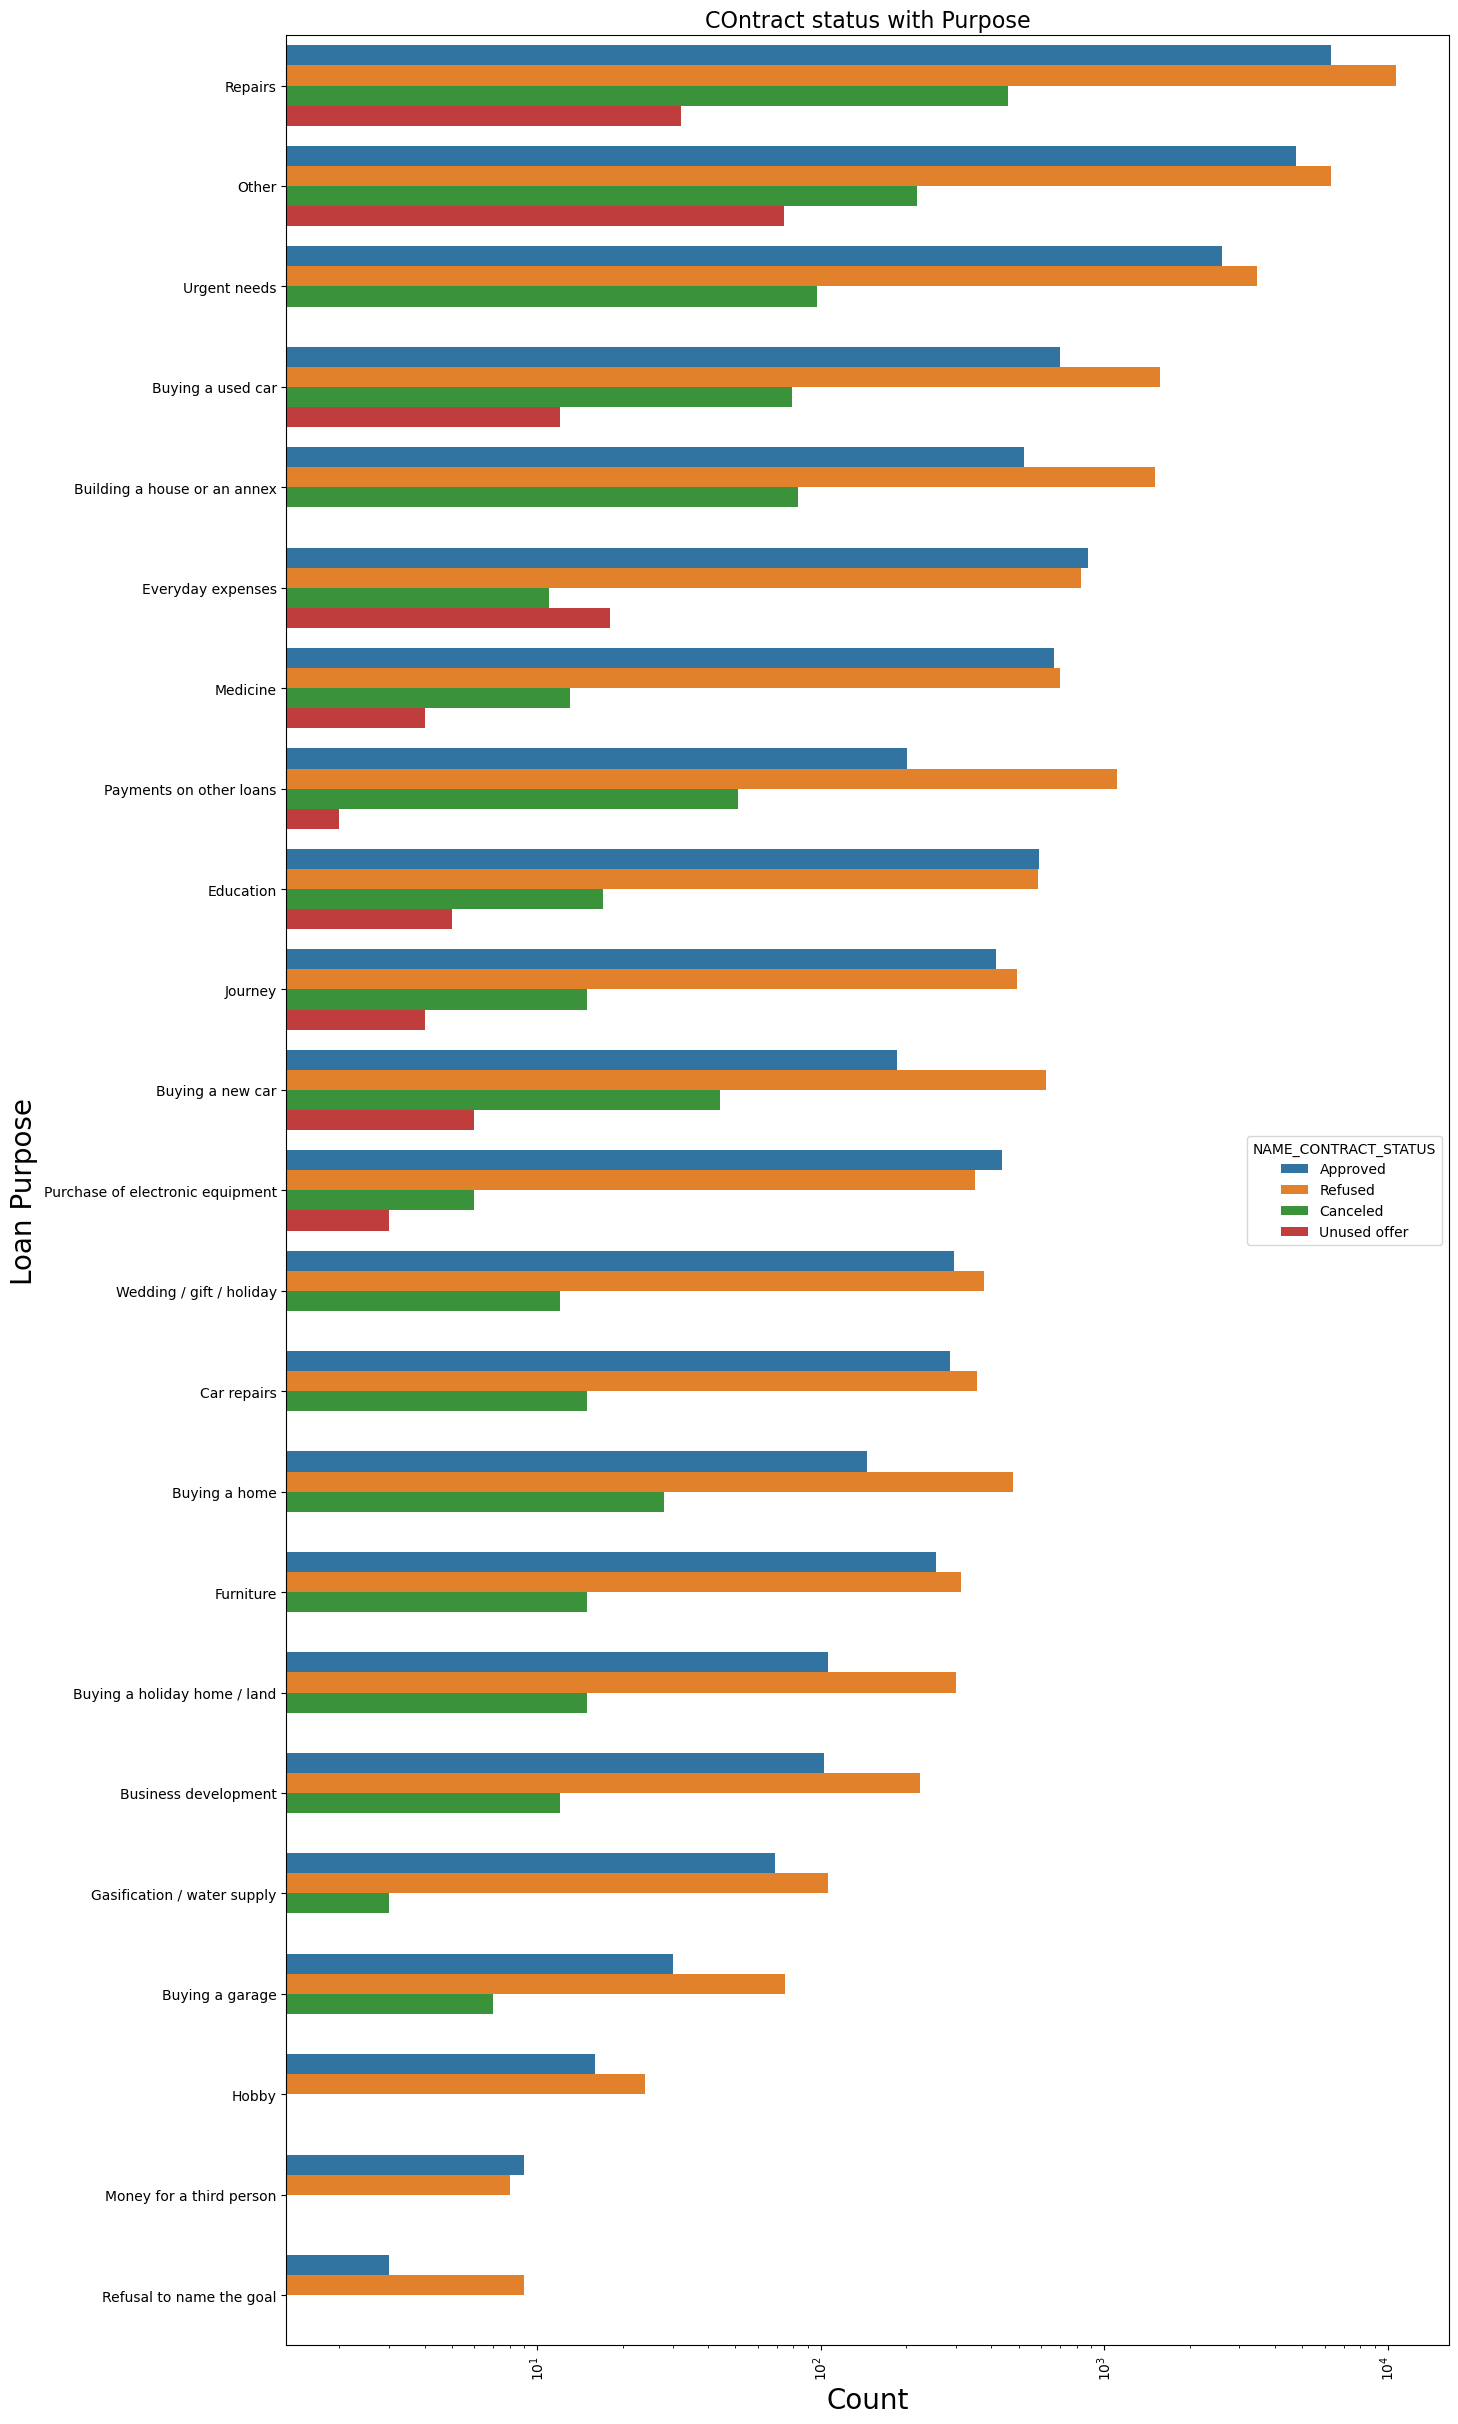

In [208]:
# Contract status 

plt.figure(figsize=(15,30))

sns.countplot(data = merge_app, y= 'NAME_CASH_LOAN_PURPOSE',order=merge_app['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

plt.title('Contract status with Purpose')
plt.xticks(rotation=90)
plt.xlabel('Count', fontsize = 20)
plt.ylabel('Loan Purpose', fontsize = 20)
plt.xscale('log')
plt.show()

- Most Loan rejections and approvals were for Repair and other Purpose.
- Loan for Education has equal number of rejections and approvals
- Loans for buying cars, home loans and payment of other loans have significantly higher number of rejections as compared to aprovals

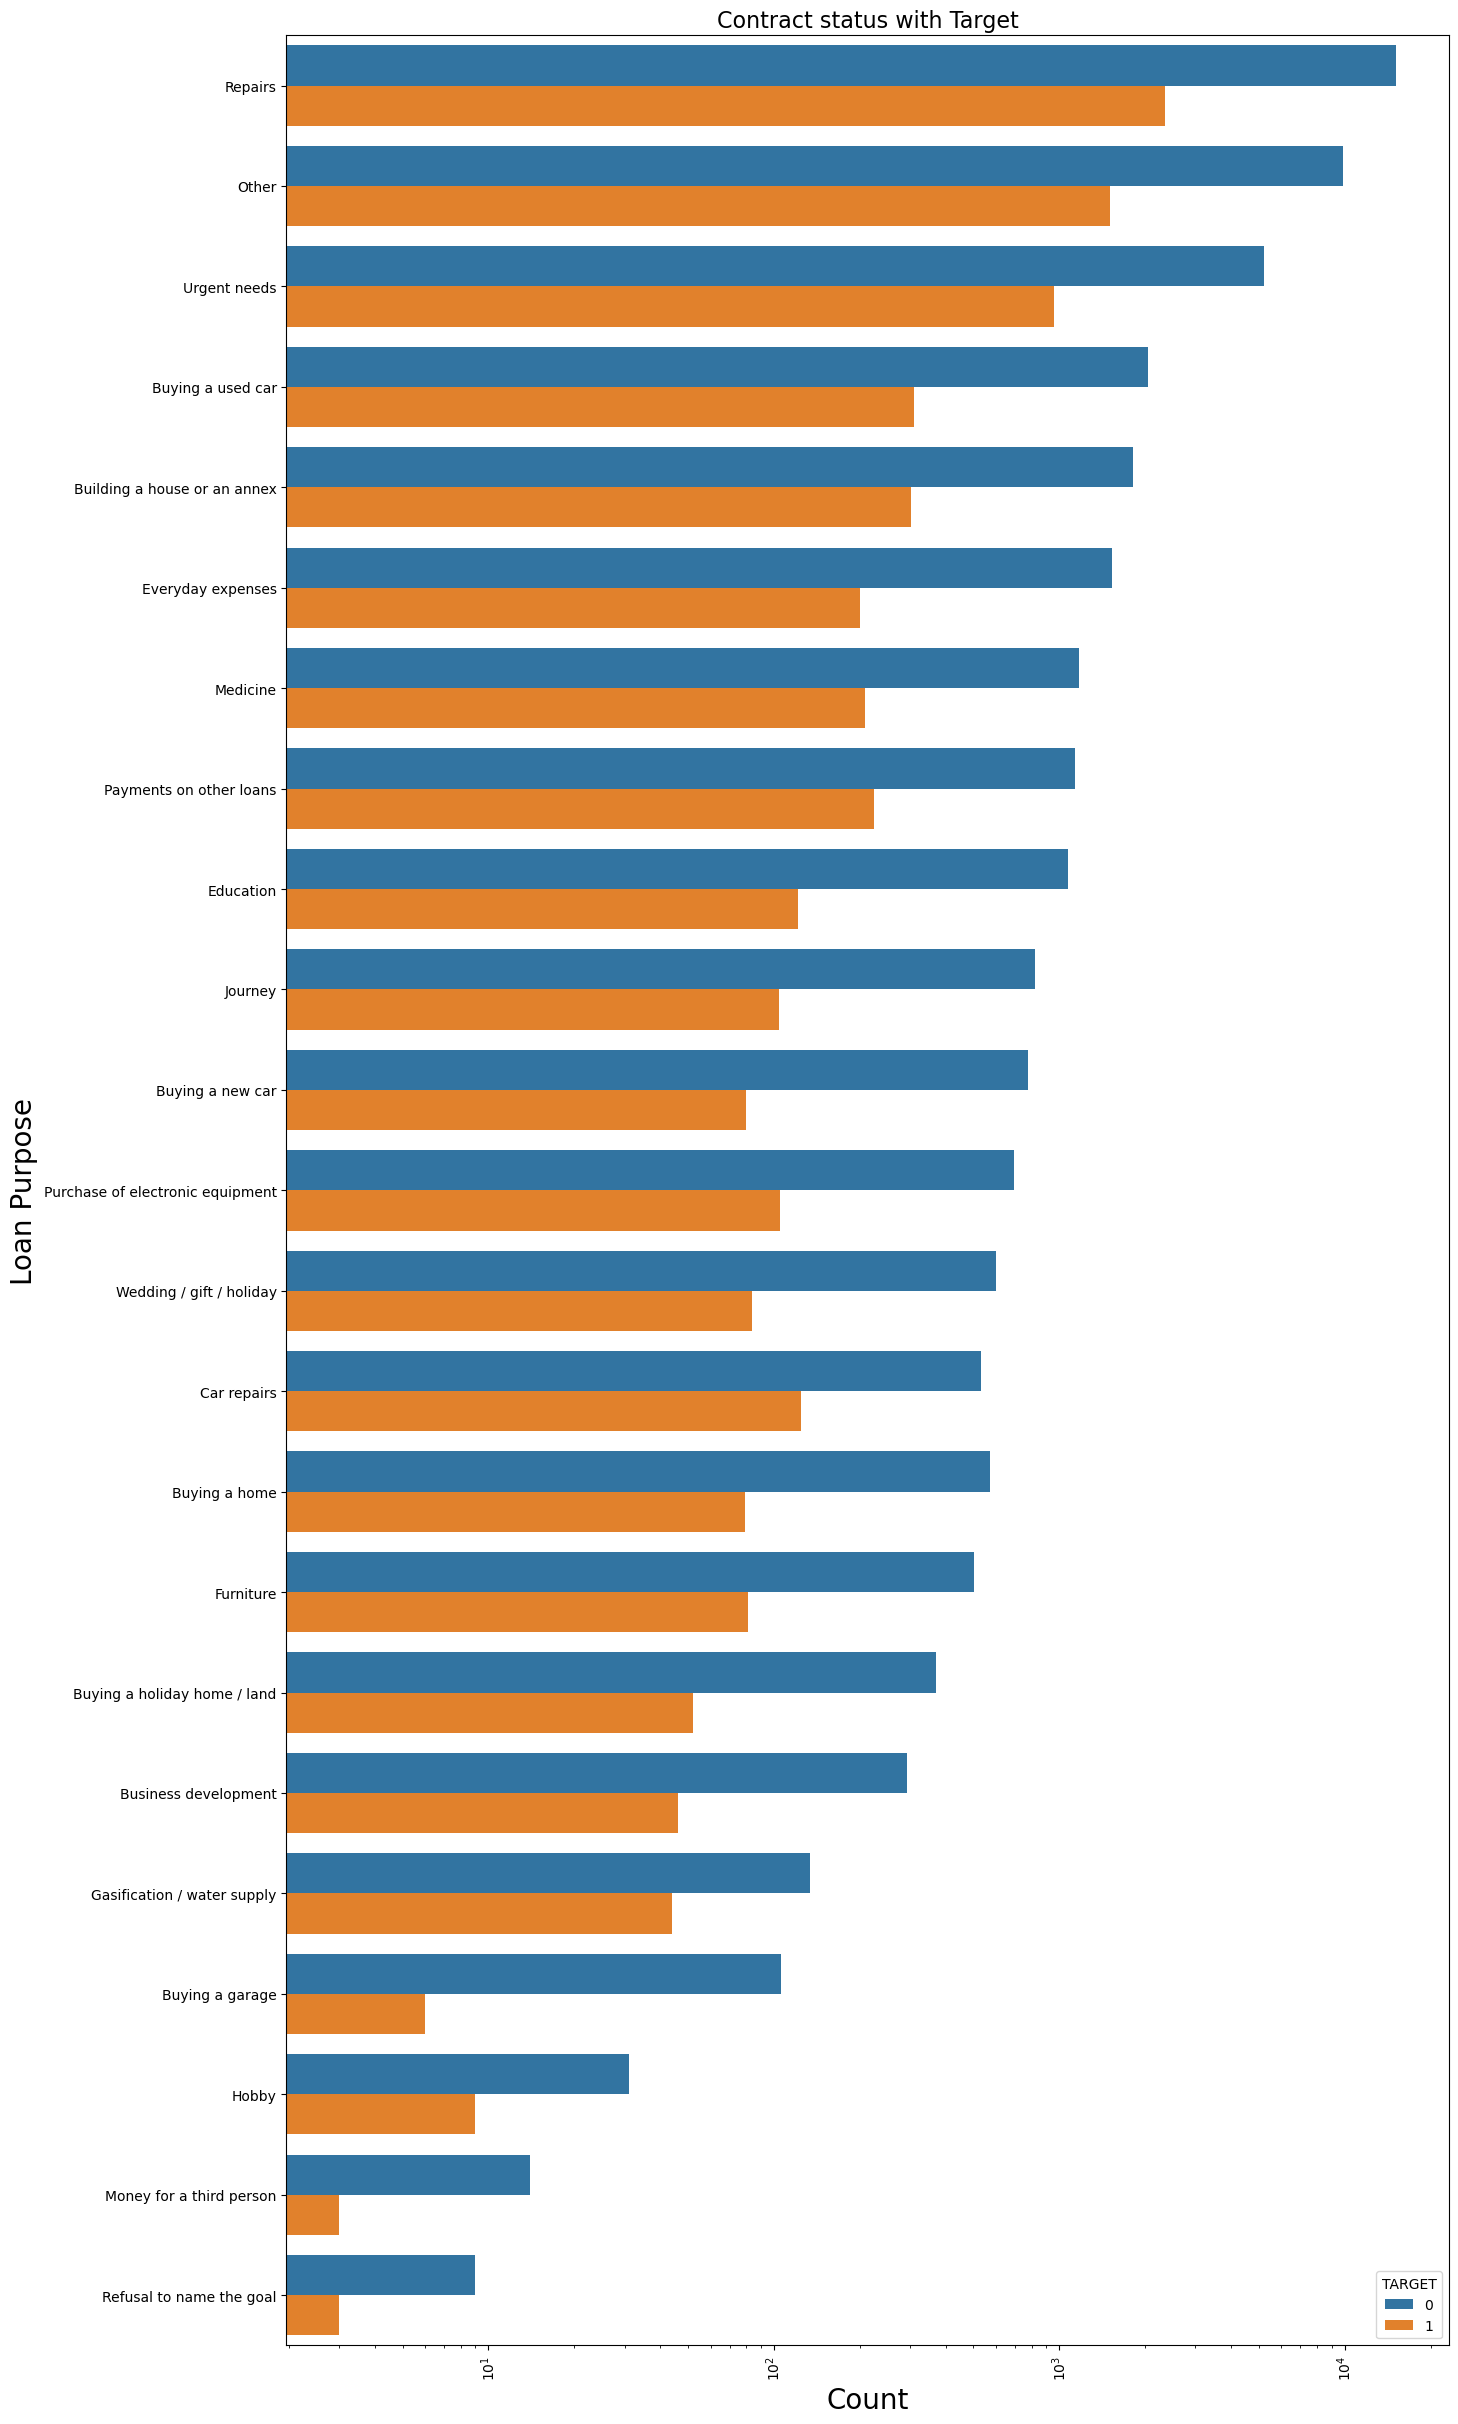

In [211]:
# Contract status 

plt.figure(figsize=(15,30))

sns.countplot(data = merge_app, y= 'NAME_CASH_LOAN_PURPOSE',order=merge_app['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

plt.title('Contract status with Target')
plt.xticks(rotation=90)
plt.xlabel('Count', fontsize = 20)
plt.ylabel('Loan Purpose', fontsize = 20)
plt.xscale('log')
plt.show()

- Again Repair Loans have high number of Non-Defaulters but also have relatively high number of people with payment difficulties
- Laon for Buying a Garage, Electronics loans, homeloans , car loans and business loans have lower number of defaulters as compared to Non-defaulters

### Bivariate Analysis



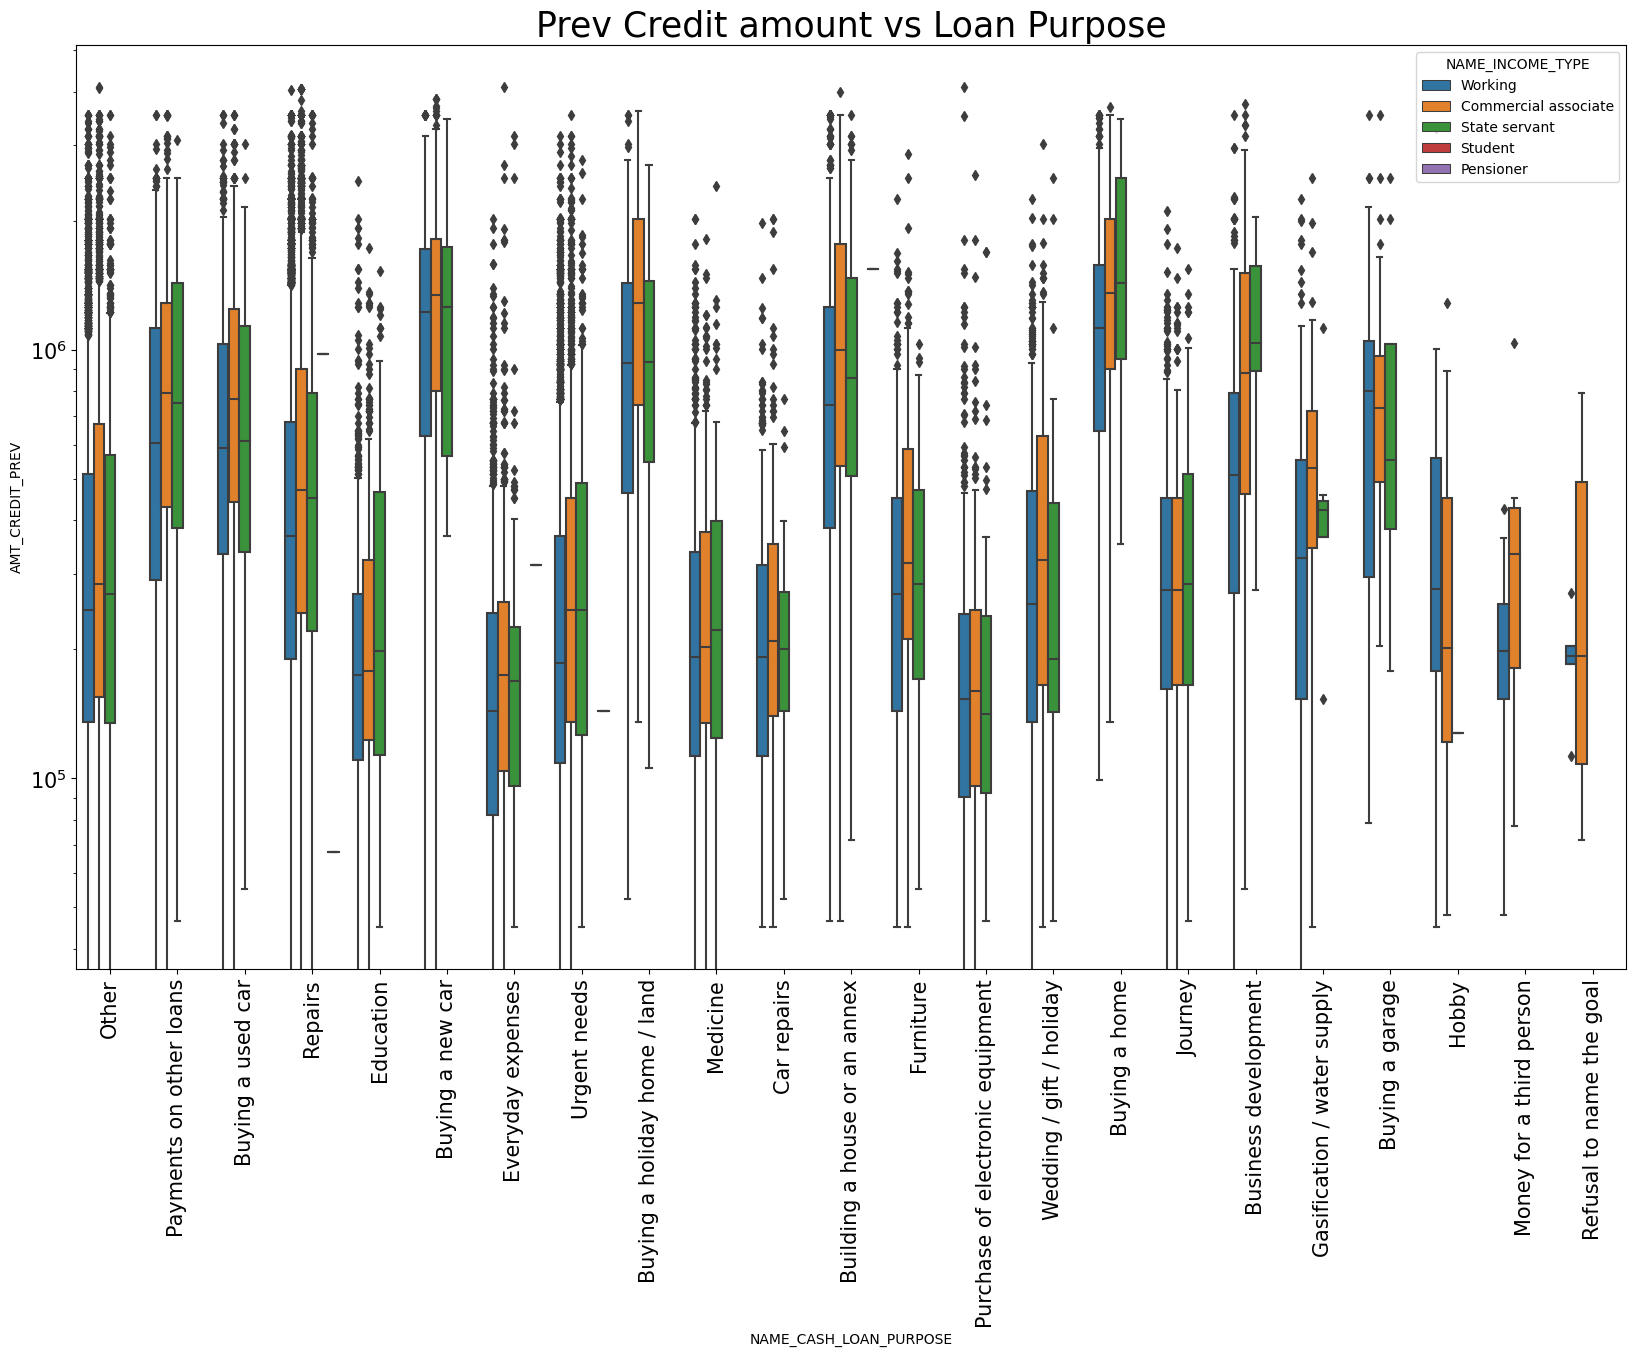

In [213]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merge_app, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Prev Credit amount vs Loan Purpose',fontsize = 25)
plt.show()

From the above we can conclude some points-

- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
- Income type of state servants have a significant amount of credit applied
- Money for third person or a Hobby is having less credits applied for.

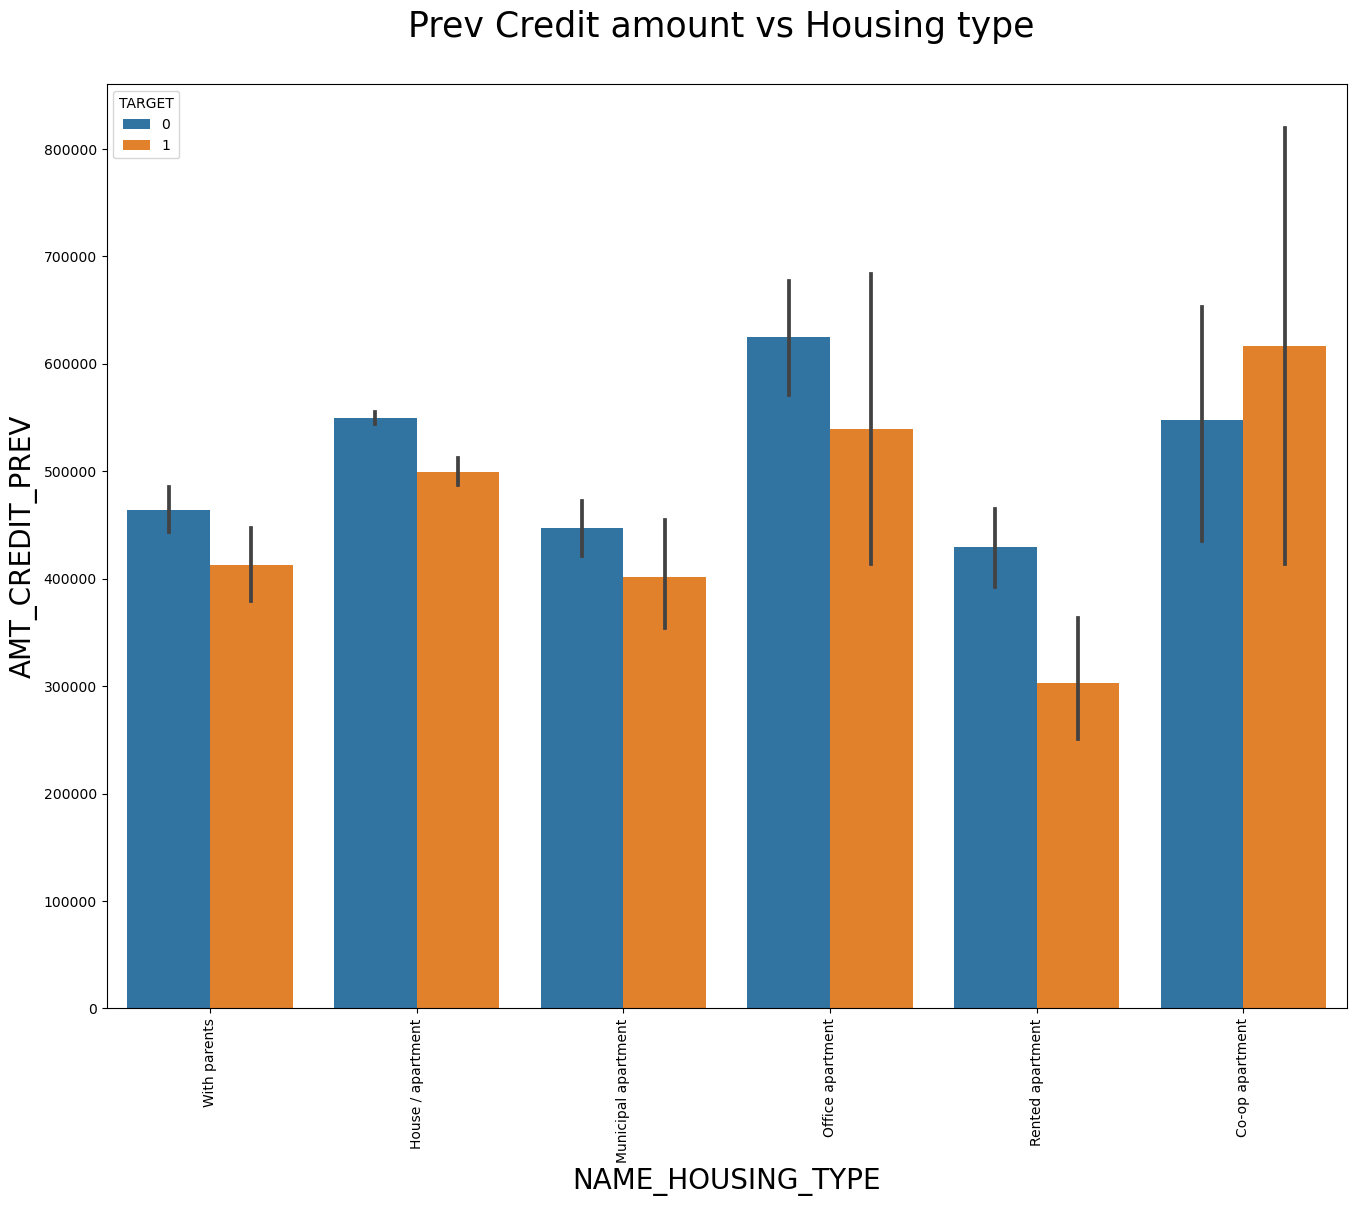

In [216]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merge_app, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type \n', fontsize = 25)
plt.xlabel('NAME_HOUSING_TYPE',fontsize = 20)
plt.ylabel('AMT_CREDIT_PREV',fontsize = 20)
plt.show()


 - For Housing type, office appartment have higher credit of target 0 and co-op apartment is having higher credit of target 1.

- So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

## Conclusion 

Banks should focus more on Low risk groups such as

- Businessman as Business loans are high repayment group
- Females have higher success in laon repayments.
- Senior clients , Married clients have high loan repayment rate
- It is significant that more educated clients,  High Income Clients and Clients with lesser family members payback loans on time.

Banks should avoid high risk groups such as

- Unemployed people and people with lower education levels
- Young clients and clients on maternity leave
- Clients with larger numer of co-dependentrs or family members.